In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import rankdata

import scipy.spatial
from itertools import combinations
from scipy.spatial.distance import pdist
from scipy import optimize
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# filter warning

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=FutureWarning)

C:\Users\panag\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.style.use('ggplot')

In [3]:
locations = pd.read_csv('Data\stations.txt', sep=' ', index_col=0)

locations.head(20)

,database,station_latitude(dec.degree),station_longitude(dec.degree),station_altitude(m)
station_name,,,,
TILLABERI,AMMA-CATCH,14.204300,1.454500,212.0
TOBRE,AMMA-CATCH,10.199100,2.133500,371.0
TARA,AMMA-CATCH,15.251400,-1.585500,335.0
AGOUFOU,AMMA-CATCH,15.360000,-1.470000,340.0
LAWRA,MARLOES,10.866670,-1.483330,305.0
NAVRONGO,MARLOES,10.530000,-1.050000,201.3
OUAHIGOUYA,MARLOES,13.520000,-2.390000,365.0
TAMALE,MARLOES,9.330000,-0.510000,183.3
WA,MARLOES,10.030000,-2.090000,322.7


## Next, we are going to merge the 1-pixel satelite products with the gauge measurements only at the dates that both values are measured: TRAINING DATA

In [4]:
# load the .csv 

TILLABERIsat1 = pd.read_csv("OrganisedData\MSWEP\TILLABERIsat1.csv", index_col=0)
TOBREsat1 = pd.read_csv("OrganisedData\MSWEP\TOBREsat1.csv", index_col=0)
TARAsat1 = pd.read_csv("OrganisedData\MSWEP\TARAsat1.csv", index_col=0)
AGOUFOUsat1 = pd.read_csv("OrganisedData\MSWEP\AGOUFOUsat1.csv", index_col=0)
LAWRAsat1 = pd.read_csv("OrganisedData\MSWEP\LAWRAsat1.csv", index_col=0)
NAVRONGOsat1 = pd.read_csv("OrganisedData\MSWEP\\NAVRONGOsat1.csv", index_col=0)
OUAHIGOUYAsat1 = pd.read_csv("OrganisedData\MSWEP\OUAHIGOUYAsat1.csv", index_col=0)
TAMALEsat1 = pd.read_csv("OrganisedData\MSWEP\TAMALEsat1.csv", index_col=0)
WAsat1 = pd.read_csv("OrganisedData\MSWEP\WAsat1.csv", index_col=0)
ZUARUNGUsat1 = pd.read_csv("OrganisedData\MSWEP\ZUARUNGUsat1.csv", index_col=0)
ANIABISIsat1 = pd.read_csv("OrganisedData\MSWEP\ANIABISIsat1.csv", index_col=0)
POUDRIsat1 = pd.read_csv("OrganisedData\MSWEP\POUDRIsat1.csv", index_col=0)
LAREsat1 = pd.read_csv("OrganisedData\MSWEP\LAREsat1.csv", index_col=0)
YABOGANEsat1 = pd.read_csv("OrganisedData\MSWEP\YABOGANEsat1.csv", index_col=0)

# ZUARUNGUsat1.head(10000)

## Loading the gauge measurements, one has to make sure that: (a) the dates have no time (even discarded manually) and (b) the values have been loaded.

In [5]:
# load the time-series 

TILLABERI = pd.read_csv("OrganisedData\Gauges\stationTILLABERI.csv", index_col=0)
TOBRE = pd.read_csv("OrganisedData\Gauges\stationTOBRE.csv", index_col=0)
TARA = pd.read_csv("OrganisedData\Gauges\stationTARA.csv", index_col=0)
AGOUFOU = pd.read_csv("OrganisedData\Gauges\stationAGOUFOU.csv", index_col=0)
LAWRA = pd.read_csv("OrganisedData\Gauges\stationLAWRA.csv", index_col=0)
NAVRONGO = pd.read_csv("OrganisedData\Gauges\\stationNAVRONGO.csv", index_col=0)
OUAHIGOUYA = pd.read_csv("OrganisedData\Gauges\stationOUAHIGOUYA.csv", index_col=0)
TAMALE = pd.read_csv("OrganisedData\Gauges\stationTAMALE.csv", index_col=0)
WA = pd.read_csv("OrganisedData\Gauges\stationWA.csv", index_col=0)
ZUARUNGU = pd.read_csv("OrganisedData\Gauges\stationZUARUNGU.csv", index_col=0)
ANIABISI = pd.read_csv("OrganisedData\Gauges\stationANIABISI.csv", index_col=0)
POUDRI = pd.read_csv("OrganisedData\Gauges\stationPOUDRI.csv", index_col=0)
LARE = pd.read_csv("OrganisedData\Gauges\stationLARE.csv", index_col=0)
YABOGANE = pd.read_csv("OrganisedData\Gauges\stationYABOGANE.csv", index_col=0)

# AGOUFOU.head(10000)

# Occurence modeling with 3-day sums

In [155]:
thr = 3.0  # 1mm/day -> 3mm threshold for no rainfall in the 3-day sum-scale

# 1. TILLABERI

In [7]:
TILLABERItrain = TILLABERI.merge(TILLABERIsat1, how='left', left_on=TILLABERI.index, right_on=TILLABERIsat1.index)
TILLABERItrain.rename(columns = {'key_0': 'Date', 'R[mm]_x':'g[mm]', 'R[mm]_y':'sat[mm]'}, inplace=True)
TILLABERItrain.set_index('Date', inplace=True)

TILLABERItrain.index = pd.to_datetime(TILLABERItrain.index, errors='coerce')

In [8]:
# TILLABERItrain

In [9]:
TILLABERItrain['g[mm]'] = TILLABERItrain['g[mm]'].resample(rule = '3d').sum()
TILLABERItrain['sat[mm]'] = TILLABERItrain['sat[mm]'].resample(rule = '3d').sum()
TILLABERItrain = TILLABERItrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

# TILLABERItrain

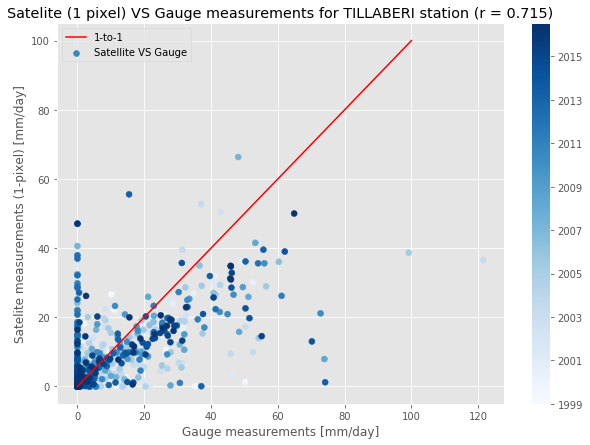

In [10]:
# correlation estimation

rho = TILLABERItrain['g[mm]'].corr(TILLABERItrain['sat[mm]'])

# plotrho = TILLABERItrain['g[mm]'].corr(TILLABERItrain['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(TILLABERItrain['g[mm]'], TILLABERItrain['sat[mm]'], c=range(len(TILLABERItrain.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 100, 2), np.linspace(0, 100, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TILLABERItrain.index.year[np.arange(0, len(TILLABERItrain), 250)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Satelite (1 pixel) VS Gauge measurements for TILLABERI station (r = {rho:.3f})');

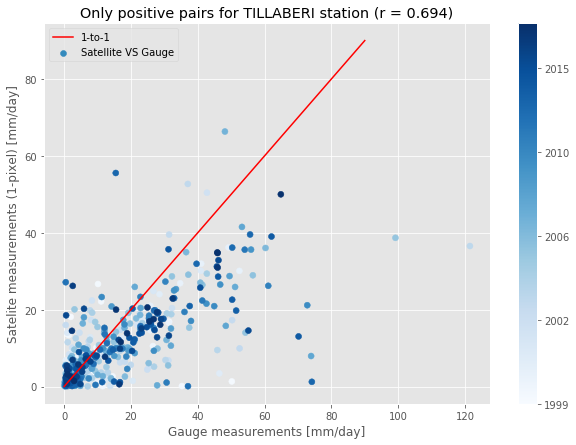

In [11]:
TILLABERItrainPOS = TILLABERItrain[(TILLABERItrain['g[mm]'] > 0.0) & (TILLABERItrain['sat[mm]'] > 0.0)]

rho = TILLABERItrainPOS['g[mm]'].corr(TILLABERItrainPOS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(TILLABERItrainPOS['g[mm]'], TILLABERItrainPOS['sat[mm]'], c=range(len(TILLABERItrainPOS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TILLABERItrainPOS.index.year[np.arange(0, len(TILLABERItrainPOS), 100)]
clb.ax.yaxis.set_ticklabels(new_ticks)


plt.legend()

plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive pairs for TILLABERI station (r = {rho:.3f})');

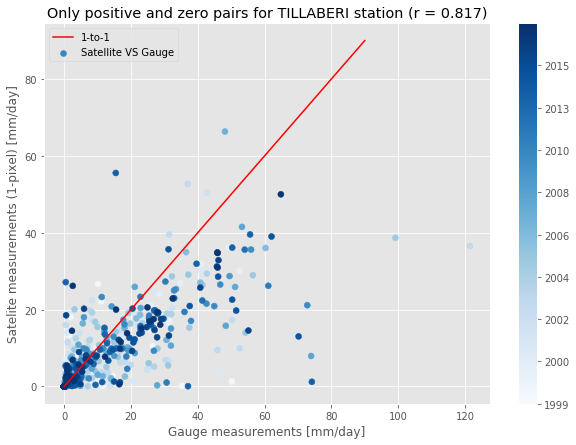

In [12]:
TILLABERItrainPOSandZEROS = TILLABERItrain[((TILLABERItrain['g[mm]'] > 0.0) & (TILLABERItrain['sat[mm]'] > 0.0))  |  ((TILLABERItrain['g[mm]'] == 0.0) & (TILLABERItrain['sat[mm]'] == 0.0))]

rho = TILLABERItrainPOSandZEROS['g[mm]'].corr(TILLABERItrainPOSandZEROS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(TILLABERItrainPOSandZEROS['g[mm]'], TILLABERItrainPOSandZEROS['sat[mm]'], c=range(len(TILLABERItrainPOSandZEROS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TILLABERItrainPOSandZEROS.index.year[np.arange(0, len(TILLABERItrainPOSandZEROS), 200)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive and zero pairs for TILLABERI station (r = {rho:.3f})');

### occurence dataset

In [13]:
TILLABERItrain['gauge'] = TILLABERItrain['g[mm]']
TILLABERItrain['gauge'][TILLABERItrain['g[mm]'] < thr] = 'No Rain'
TILLABERItrain['gauge'][TILLABERItrain['g[mm]'] >= thr] = 'Rain'

TILLABERItrain['satellite'] = TILLABERItrain['sat[mm]']
TILLABERItrain['satellite'][TILLABERItrain['sat[mm]'] < thr] = 'No Rain'
TILLABERItrain['satellite'][TILLABERItrain['sat[mm]'] >= thr] = 'Rain'

TILLABERItrain.head(70)

,g[mm],sat[mm],gauge,satellite
Date,,,,
1999-01-01,0.00,0.000000,No Rain,No Rain
1999-01-04,0.00,0.000000,No Rain,No Rain
1999-01-07,0.00,0.000000,No Rain,No Rain
1999-01-10,0.00,0.000000,No Rain,No Rain
1999-01-13,0.00,0.000000,No Rain,No Rain
...,...,...,...,...
1999-07-15,1.97,18.110001,No Rain,Rain
1999-07-18,50.21,1.320000,Rain,No Rain
1999-07-21,8.73,3.730000,Rain,Rain


In [14]:
N = len(TILLABERItrain)
hits = len(np.where((TILLABERItrain['satellite'] == 'Rain') & (TILLABERItrain['gauge'] == 'Rain'))[0])
FalseAlarms = len(np.where((TILLABERItrain['satellite'] == 'Rain') & (TILLABERItrain['gauge'] == 'No Rain'))[0])
misses = len(np.where((TILLABERItrain['satellite'] == 'No Rain') & (TILLABERItrain['gauge'] == 'Rain'))[0])
TrueNegatives = len(np.where((TILLABERItrain['satellite'] == 'No Rain') & (TILLABERItrain['gauge'] == 'No Rain'))[0])

POD = hits / (hits + misses)
SR = hits / (hits + FalseAlarms)
FBias = (hits + FalseAlarms) / (hits + misses)
TS = hits / (hits + misses + FalseAlarms)


# print scores
print(f'Probability Of Detection: {POD:.2f}')
print(f'Success Ratio: {SR:.2f}')
print(f'Frequency Bias: {FBias:.2f}')
print(f'Threat Score: {TS:.2f}')

Probability Of Detection: 0.81
Success Ratio: 0.65
Frequency Bias: 1.25
Threat Score: 0.56



               precision    recall  f1-score   support

     No Rain       0.92      0.96      0.94      1768
        Rain       0.81      0.65      0.72       424

    accuracy                           0.90      2192
   macro avg       0.86      0.80      0.83      2192
weighted avg       0.90      0.90      0.90      2192



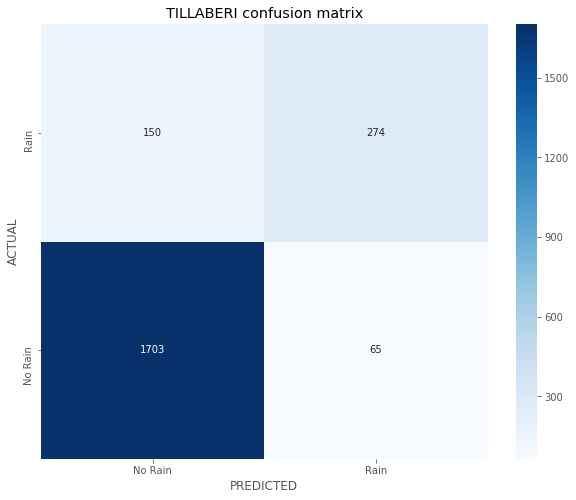

In [15]:
# confusion matrix

conf_matrix = []

labels = ['No Rain', 'Rain']

conf_matrix.append(confusion_matrix(np.array(TILLABERItrain['satellite']), TILLABERItrain['gauge']))
print('\n', classification_report(np.array(TILLABERItrain['satellite']), TILLABERItrain['gauge'], target_names = labels))  

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix[0], annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
ax.set_ylim(0, 2)  # needed for text allignment

plt.title('TILLABERI confusion matrix')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

plt.savefig('DataFigures/confusion matrix TILLABERI.png')
plt.show()
print('\n');

# 2. TOBRE

In [16]:
TOBREtrain = TOBRE.merge(TOBREsat1, how='left', left_on=TOBRE.index, right_on=TOBREsat1.index)
TOBREtrain.rename(columns = {'key_0': 'Date', 'R[mm]_x':'g[mm]', 'R[mm]_y':'sat[mm]'}, inplace=True)
TOBREtrain.set_index('Date', inplace=True)

In [17]:
TOBREtrain = TOBREtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

TOBREtrain.index = pd.to_datetime(TOBREtrain.index, errors='coerce')

# TOBREtrain

In [18]:
TOBREtrain['g[mm]'] = TOBREtrain['g[mm]'].resample(rule = '3d').sum()
TOBREtrain['sat[mm]'] = TOBREtrain['sat[mm]'].resample(rule = '3d').sum()
TOBREtrain = TOBREtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

# TOBREtrain

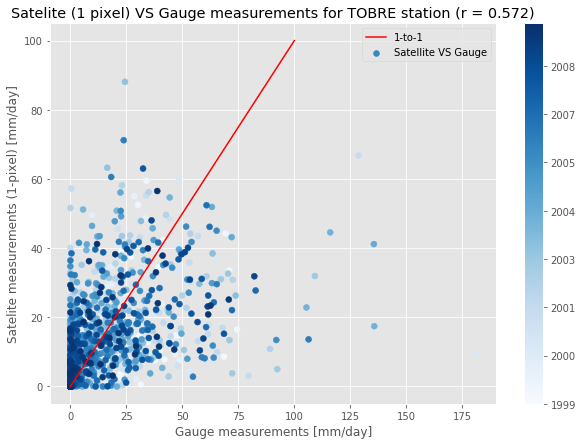

In [19]:
rho = TOBREtrain['g[mm]'].corr(TOBREtrain['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(TOBREtrain['g[mm]'], TOBREtrain['sat[mm]'], c=range(len(TOBREtrain.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 100, 2), np.linspace(0, 100, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TOBREtrain.index.year[np.arange(0, len(TOBREtrain), 150)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Satelite (1 pixel) VS Gauge measurements for TOBRE station (r = {rho:.3f})');

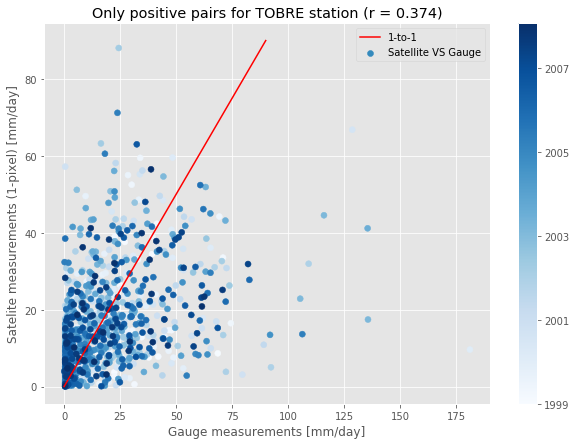

In [20]:
TOBREtrainPOS = TOBREtrain[(TOBREtrain['g[mm]'] > 0.0) & (TOBREtrain['sat[mm]'] > 0.0)]

rho = TOBREtrainPOS['g[mm]'].corr(TOBREtrainPOS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(TOBREtrainPOS['g[mm]'], TOBREtrainPOS['sat[mm]'], c=range(len(TOBREtrainPOS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TOBREtrainPOS.index.year[np.arange(0, len(TOBREtrainPOS), 100)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive pairs for TOBRE station (r = {rho:.3f})');

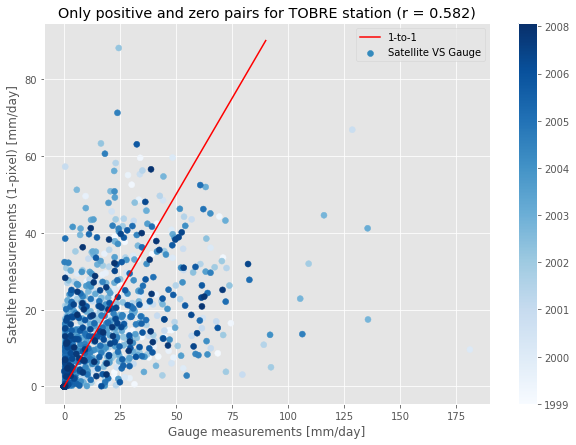

In [21]:
TOBREtrainPOSandZEROS = TOBREtrain[((TOBREtrain['g[mm]'] > 0.0) & (TOBREtrain['sat[mm]'] > 0.0))  |  ((TOBREtrain['g[mm]'] == 0.0) & (TOBREtrain['sat[mm]'] == 0.0))]

rho = TOBREtrainPOSandZEROS['g[mm]'].corr(TOBREtrainPOSandZEROS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(TOBREtrainPOSandZEROS['g[mm]'], TOBREtrainPOSandZEROS['sat[mm]'], c=range(len(TOBREtrainPOSandZEROS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TOBREtrainPOSandZEROS.index.year[np.arange(0, len(TOBREtrainPOSandZEROS), 100)]
clb.ax.yaxis.set_ticklabels(new_ticks)


plt.legend()

plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive and zero pairs for TOBRE station (r = {rho:.3f})');

In [22]:
TOBREtrain['gauge'] = TOBREtrain['g[mm]']
TOBREtrain['gauge'][TOBREtrain['g[mm]'] < thr] = 'No Rain'
TOBREtrain['gauge'][TOBREtrain['g[mm]'] >= thr] = 'Rain'

TOBREtrain['satellite'] = TOBREtrain['sat[mm]']
TOBREtrain['satellite'][TOBREtrain['sat[mm]'] < thr] = 'No Rain'
TOBREtrain['satellite'][TOBREtrain['sat[mm]'] >= thr] = 'Rain'

TOBREtrain.head(70)

,g[mm],sat[mm],gauge,satellite
Date,,,,
1999-01-01,0.00,0.00,No Rain,No Rain
1999-01-04,0.00,0.00,No Rain,No Rain
1999-01-07,0.00,0.00,No Rain,No Rain
1999-01-10,0.00,0.00,No Rain,No Rain
1999-01-13,0.00,0.00,No Rain,No Rain
...,...,...,...,...
1999-08-02,0.48,8.04,No Rain,Rain
1999-08-05,0.48,14.95,No Rain,Rain
1999-08-08,4.27,23.40,Rain,Rain


In [23]:
N = len(TOBREtrain)
hits = len(np.where((TOBREtrain['satellite'] == 'Rain') & (TOBREtrain['gauge'] == 'Rain'))[0])
FalseAlarms = len(np.where((TOBREtrain['satellite'] == 'Rain') & (TOBREtrain['gauge'] == 'No Rain'))[0])
misses = len(np.where((TOBREtrain['satellite'] == 'No Rain') & (TOBREtrain['gauge'] == 'Rain'))[0])
TrueNegatives = len(np.where((TOBREtrain['satellite'] == 'No Rain') & (TOBREtrain['gauge'] == 'No Rain'))[0])

POD = hits / (hits + misses)
SR = hits / (hits + FalseAlarms)
FBias = (hits + FalseAlarms) / (hits + misses)
TS = hits / (hits + misses + FalseAlarms)


# print scores
print(f'Probability Of Detection: {POD:.2f}')
print(f'Success Ratio: {SR:.2f}')
print(f'Frequency Bias: {FBias:.2f}')
print(f'Threat Score: {TS:.2f}')

Probability Of Detection: 0.92
Success Ratio: 0.69
Frequency Bias: 1.34
Threat Score: 0.65



               precision    recall  f1-score   support

     No Rain       0.76      0.94      0.84      1013
        Rain       0.92      0.69      0.79       959

    accuracy                           0.82      1972
   macro avg       0.84      0.82      0.82      1972
weighted avg       0.84      0.82      0.82      1972



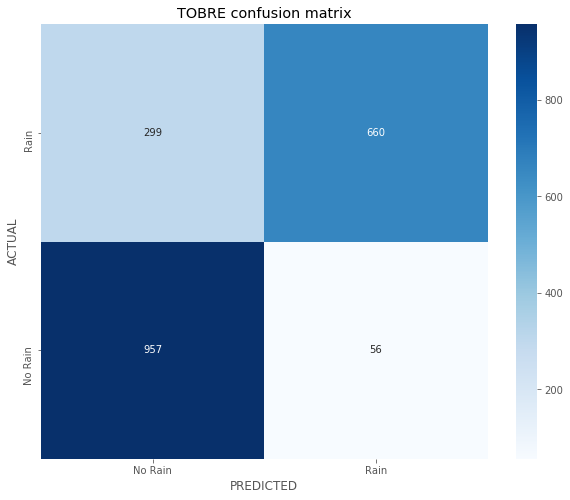

In [24]:
# confusion matrix

conf_matrix = []

labels = ['No Rain', 'Rain']

conf_matrix.append(confusion_matrix(np.array(TOBREtrain['satellite']), TOBREtrain['gauge']))
print('\n', classification_report(np.array(TOBREtrain['satellite']), TOBREtrain['gauge'], target_names = labels))  

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix[0], annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
ax.set_ylim(0, 2)  # needed for text allignment

plt.title('TOBRE confusion matrix')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

plt.savefig('DataFigures/confusion matrix TOBRE.png')
plt.show()
print('\n');

# 3. TARA

In [25]:
TARAtrain = TARA.merge(TARAsat1, how='left', left_on=TARA.index, right_on=TARAsat1.index)
TARAtrain.rename(columns = {'key_0': 'Date', 'R[mm]_x':'g[mm]', 'R[mm]_y':'sat[mm]'}, inplace=True)
TARAtrain.set_index('Date', inplace=True)

TARAtrain = TARAtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

TARAtrain.index = pd.to_datetime(TARAtrain.index, errors='coerce')

# TARAtrain

In [26]:
TARAtrain['g[mm]'] = TARAtrain['g[mm]'].resample(rule = '3d').sum()
TARAtrain['sat[mm]'] = TARAtrain['sat[mm]'].resample(rule = '3d').sum()
TARAtrain = TARAtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

# TARAtrain

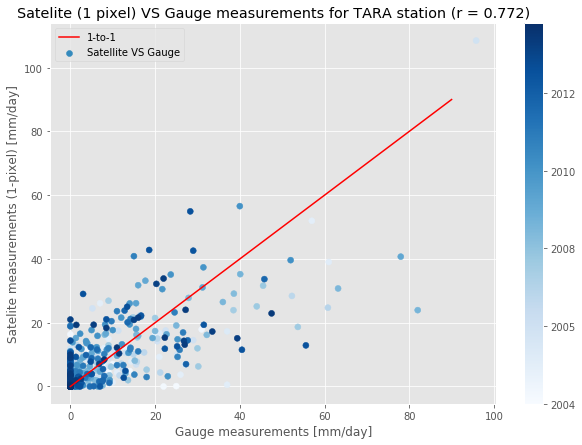

In [27]:
# correlation estimation

rho = TARAtrain['g[mm]'].corr(TARAtrain['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(TARAtrain['g[mm]'], TARAtrain['sat[mm]'], c=range(len(TARAtrain.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TARAtrain.index.year[np.arange(0, len(TARAtrain), 150)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Satelite (1 pixel) VS Gauge measurements for TARA station (r = {rho:.3f})');

### Tara station only positives

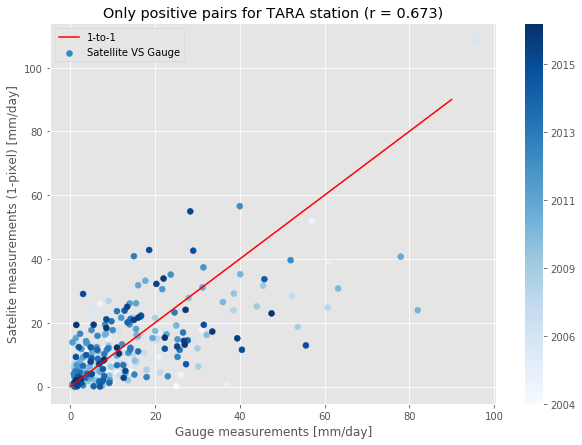

In [28]:
TARAtrainPOS = TARAtrain[(TARAtrain['g[mm]'] > 0.0) & (TARAtrain['sat[mm]'] > 0.0)]

rho = TARAtrainPOS['g[mm]'].corr(TARAtrainPOS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(TARAtrainPOS['g[mm]'], TARAtrainPOS['sat[mm]'], c=range(len(TARAtrainPOS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TARAtrainPOS.index.year[np.arange(0, len(TARAtrainPOS), 50)]
clb.ax.yaxis.set_ticklabels(new_ticks)


plt.legend()

plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive pairs for TARA station (r = {rho:.3f})');

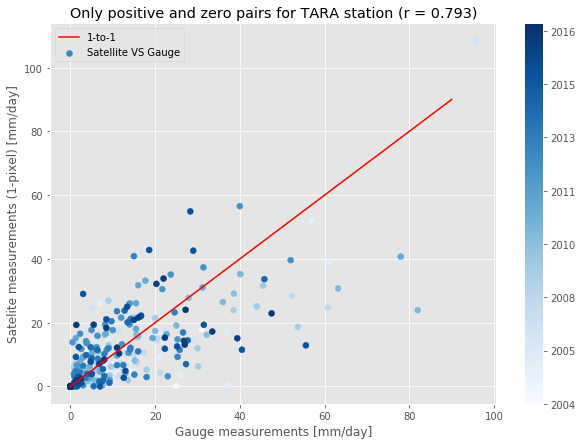

In [29]:
TARAtrainPOSandZEROS = TARAtrain[((TARAtrain['g[mm]'] > 0.0) & (TARAtrain['sat[mm]'] > 0.0))  |  ((TARAtrain['g[mm]'] == 0.0) & (TARAtrain['sat[mm]'] == 0.0))]

rho = TARAtrainPOSandZEROS['g[mm]'].corr(TARAtrainPOSandZEROS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(TARAtrainPOSandZEROS['g[mm]'], TARAtrainPOSandZEROS['sat[mm]'], c=range(len(TARAtrainPOSandZEROS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TARAtrainPOSandZEROS.index.year[np.arange(0, len(TARAtrainPOSandZEROS), 100)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive and zero pairs for TARA station (r = {rho:.3f})');

In [30]:
TARAtrain['gauge'] = TARAtrain['g[mm]']
TARAtrain['gauge'][TARAtrain['g[mm]'] < thr] = 'No Rain'
TARAtrain['gauge'][TARAtrain['g[mm]'] >= thr] = 'Rain'

TARAtrain['satellite'] = TARAtrain['sat[mm]']
TARAtrain['satellite'][TARAtrain['sat[mm]'] < thr] = 'No Rain'
TARAtrain['satellite'][TARAtrain['sat[mm]'] >= thr] = 'Rain'

# TARAtrain.head(70)

In [31]:
N = len(TARAtrain)
hits = len(np.where((TARAtrain['satellite'] == 'Rain') & (TARAtrain['gauge'] == 'Rain'))[0])
FalseAlarms = len(np.where((TARAtrain['satellite'] == 'Rain') & (TARAtrain['gauge'] == 'No Rain'))[0])
misses = len(np.where((TARAtrain['satellite'] == 'No Rain') & (TARAtrain['gauge'] == 'Rain'))[0])
TrueNegatives = len(np.where((TARAtrain['satellite'] == 'No Rain') & (TARAtrain['gauge'] == 'No Rain'))[0])

POD = hits / (hits + misses)
SR = hits / (hits + FalseAlarms)
FBias = (hits + FalseAlarms) / (hits + misses)
TS = hits / (hits + misses + FalseAlarms)


# print scores
print(f'Probability Of Detection: {POD:.2f}')
print(f'Success Ratio: {SR:.2f}')
print(f'Frequency Bias: {FBias:.2f}')
print(f'Threat Score: {TS:.2f}')

Probability Of Detection: 0.84
Success Ratio: 0.66
Frequency Bias: 1.28
Threat Score: 0.59



               precision    recall  f1-score   support

     No Rain       0.87      0.95      0.90       685
        Rain       0.84      0.66      0.74       296

    accuracy                           0.86       981
   macro avg       0.85      0.80      0.82       981
weighted avg       0.86      0.86      0.85       981



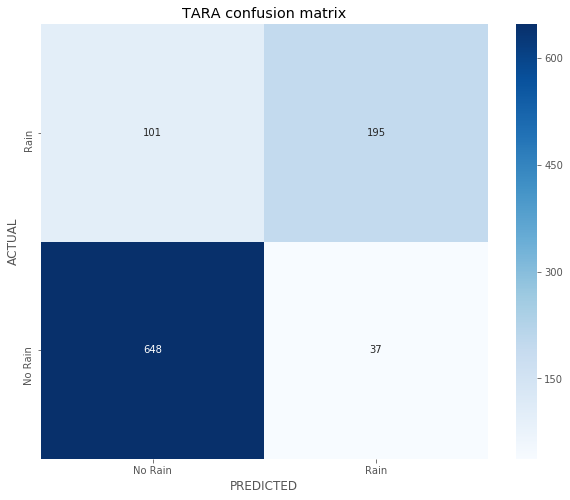

In [32]:
# confusion matrix

conf_matrix = []

labels = ['No Rain', 'Rain']

conf_matrix.append(confusion_matrix(np.array(TARAtrain['satellite']), TARAtrain['gauge']))
print('\n', classification_report(np.array(TARAtrain['satellite']), TARAtrain['gauge'], target_names = labels))  

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix[0], annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
ax.set_ylim(0, 2)  # needed for text allignment

plt.title('TARA confusion matrix')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

plt.savefig('DataFigures/confusion matrix TARA.png')
plt.show()
print('\n');

# 4. AGOUFOU

In [33]:
AGOUFOUtrain = AGOUFOU.merge(AGOUFOUsat1, how='left', left_on=AGOUFOU.index, right_on=AGOUFOUsat1.index)
AGOUFOUtrain.rename(columns = {'key_0': 'Date', 'R[mm]_x':'g[mm]', 'R[mm]_y':'sat[mm]'}, inplace=True)
AGOUFOUtrain.set_index('Date', inplace=True)

AGOUFOUtrain = AGOUFOUtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

AGOUFOUtrain.index = pd.to_datetime(AGOUFOUtrain.index, errors='coerce')


# AGOUFOUtrain

In [34]:
AGOUFOUtrain['g[mm]'] = AGOUFOUtrain['g[mm]'].resample(rule = '3d').sum()
AGOUFOUtrain['sat[mm]'] = AGOUFOUtrain['sat[mm]'].resample(rule = '3d').sum()
AGOUFOUtrain = AGOUFOUtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

# AGOUFOUtrain

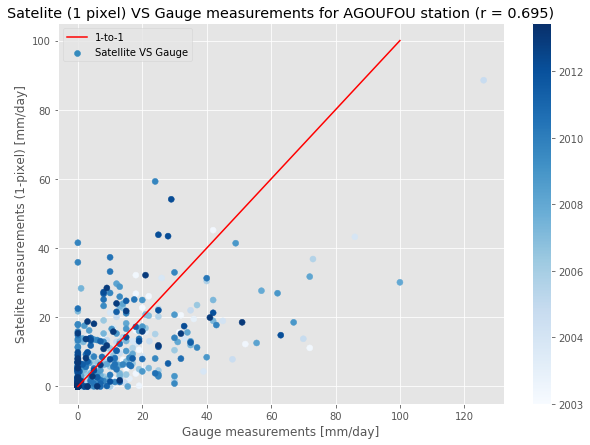

In [35]:
# correlation estimation

rho = AGOUFOUtrain['g[mm]'].corr(AGOUFOUtrain['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(AGOUFOUtrain['g[mm]'], AGOUFOUtrain['sat[mm]'], c=range(len(AGOUFOUtrain.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 100, 2), np.linspace(0, 100, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = AGOUFOUtrain.index.year[np.arange(0, len(AGOUFOUtrain), 150)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Satelite (1 pixel) VS Gauge measurements for AGOUFOU station (r = {rho:.3f})');

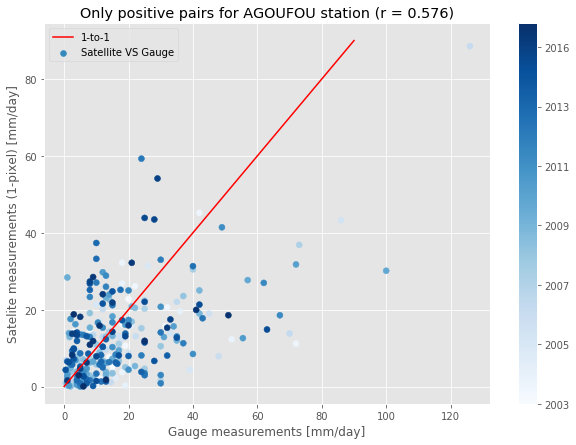

In [36]:
AGOUFOUtrainPOS = AGOUFOUtrain[(AGOUFOUtrain['g[mm]'] > 0.0) & (AGOUFOUtrain['sat[mm]'] > 0.0)]

rho = AGOUFOUtrainPOS['g[mm]'].corr(AGOUFOUtrainPOS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(AGOUFOUtrainPOS['g[mm]'], AGOUFOUtrainPOS['sat[mm]'], c=range(len(AGOUFOUtrainPOS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = AGOUFOUtrainPOS.index.year[np.arange(0, len(AGOUFOUtrainPOS), 50)]
clb.ax.yaxis.set_ticklabels(new_ticks)


plt.legend()

plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive pairs for AGOUFOU station (r = {rho:.3f})');

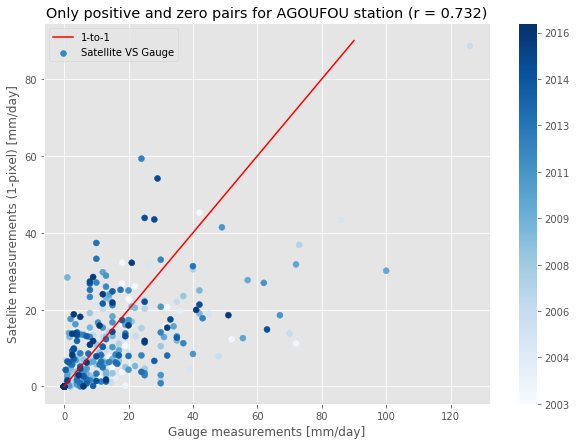

In [37]:
AGOUFOUtrainPOSandZEROS = AGOUFOUtrain[((AGOUFOUtrain['g[mm]'] > 0.0) & (AGOUFOUtrain['sat[mm]'] > 0.0))  |  ((AGOUFOUtrain['g[mm]'] == 0.0) & (AGOUFOUtrain['sat[mm]'] == 0.0))]

rho = AGOUFOUtrainPOSandZEROS['g[mm]'].corr(AGOUFOUtrainPOSandZEROS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(AGOUFOUtrainPOSandZEROS['g[mm]'], AGOUFOUtrainPOSandZEROS['sat[mm]'], c=range(len(AGOUFOUtrainPOSandZEROS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = AGOUFOUtrainPOSandZEROS.index.year[np.arange(0, len(AGOUFOUtrainPOSandZEROS), 100)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive and zero pairs for AGOUFOU station (r = {rho:.3f})');

In [38]:
AGOUFOUtrain['gauge'] = AGOUFOUtrain['g[mm]']
AGOUFOUtrain['gauge'][AGOUFOUtrain['g[mm]'] < thr] = 'No Rain'
AGOUFOUtrain['gauge'][AGOUFOUtrain['g[mm]'] >= thr] = 'Rain'

AGOUFOUtrain['satellite'] = AGOUFOUtrain['sat[mm]']
AGOUFOUtrain['satellite'][AGOUFOUtrain['sat[mm]'] < thr] = 'No Rain'
AGOUFOUtrain['satellite'][AGOUFOUtrain['sat[mm]'] >= thr] = 'Rain'

# AGOUFOUtrain.head(70)

In [39]:
N = len(AGOUFOUtrain)
hits = len(np.where((AGOUFOUtrain['satellite'] == 'Rain') & (AGOUFOUtrain['gauge'] == 'Rain'))[0])
FalseAlarms = len(np.where((AGOUFOUtrain['satellite'] == 'Rain') & (AGOUFOUtrain['gauge'] == 'No Rain'))[0])
misses = len(np.where((AGOUFOUtrain['satellite'] == 'No Rain') & (AGOUFOUtrain['gauge'] == 'Rain'))[0])
TrueNegatives = len(np.where((AGOUFOUtrain['satellite'] == 'No Rain') & (AGOUFOUtrain['gauge'] == 'No Rain'))[0])

POD = hits / (hits + misses)
SR = hits / (hits + FalseAlarms)
FBias = (hits + FalseAlarms) / (hits + misses)
TS = hits / (hits + misses + FalseAlarms)


# print scores
print(f'Probability Of Detection: {POD:.2f}')
print(f'Success Ratio: {SR:.2f}')
print(f'Frequency Bias: {FBias:.2f}')
print(f'Threat Score: {TS:.2f}')

Probability Of Detection: 0.79
Success Ratio: 0.70
Frequency Bias: 1.13
Threat Score: 0.59



               precision    recall  f1-score   support

     No Rain       0.89      0.93      0.91       821
        Rain       0.79      0.70      0.74       324

    accuracy                           0.86      1145
   macro avg       0.84      0.81      0.82      1145
weighted avg       0.86      0.86      0.86      1145



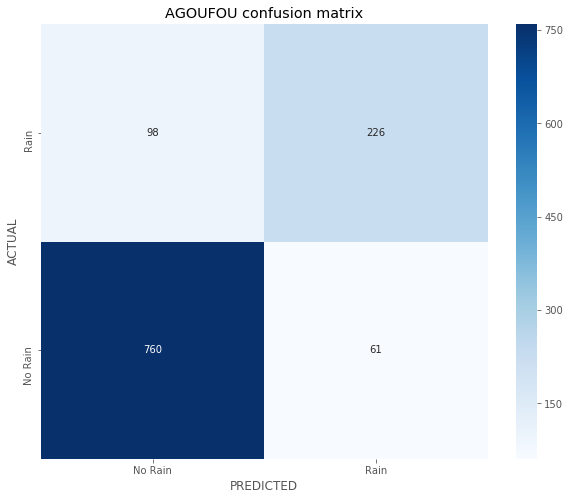

In [40]:
# confusion matrix

conf_matrix = []

labels = ['No Rain', 'Rain']

conf_matrix.append(confusion_matrix(np.array(AGOUFOUtrain['satellite']), AGOUFOUtrain['gauge']))
print('\n', classification_report(np.array(AGOUFOUtrain['satellite']), AGOUFOUtrain['gauge'], target_names = labels))  

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix[0], annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
ax.set_ylim(0, 2)  # needed for text allignment

plt.title('AGOUFOU confusion matrix')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

plt.savefig('DataFigures/confusion matrix AGOUFOU.png')
plt.show()
print('\n');

# 5. LAWRA

In [41]:
LAWRAtrain = LAWRA.merge(LAWRAsat1, how='left', left_on=LAWRA.index, right_on=LAWRAsat1.index)
LAWRAtrain.rename(columns = {'key_0': 'Date', 'R[mm]_x':'g[mm]', 'R[mm]_y':'sat[mm]'}, inplace=True)
LAWRAtrain.set_index('Date', inplace=True)

LAWRAtrain = LAWRAtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

LAWRAtrain.index = pd.to_datetime(LAWRAtrain.index, errors='coerce')

# LAWRAtrain

In [42]:
LAWRAtrain['g[mm]'] = LAWRAtrain['g[mm]'].resample(rule = '3d').sum()
LAWRAtrain['sat[mm]'] = LAWRAtrain['sat[mm]'].resample(rule = '3d').sum()
LAWRAtrain = LAWRAtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

# LAWRAtrain

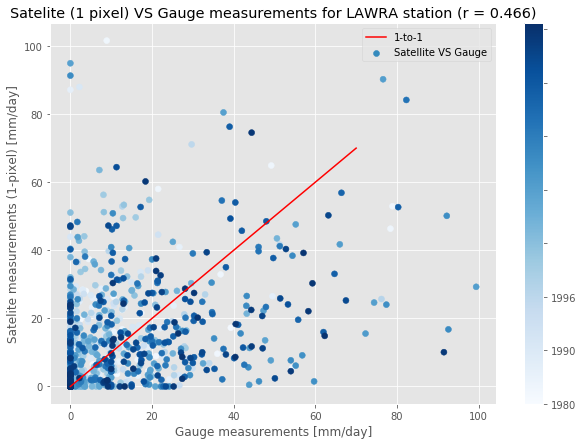

In [43]:
rho = LAWRAtrain['g[mm]'].corr(LAWRAtrain['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(LAWRAtrain['g[mm]'], LAWRAtrain['sat[mm]'], c=range(len(LAWRAtrain.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 70, 2), np.linspace(0, 70, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = LAWRAtrain.index.year[np.arange(0, len(LAWRAtrain), 500)]
clb.ax.yaxis.set_ticklabels(new_ticks)


plt.legend()

plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Satelite (1 pixel) VS Gauge measurements for LAWRA station (r = {rho:.3f})');

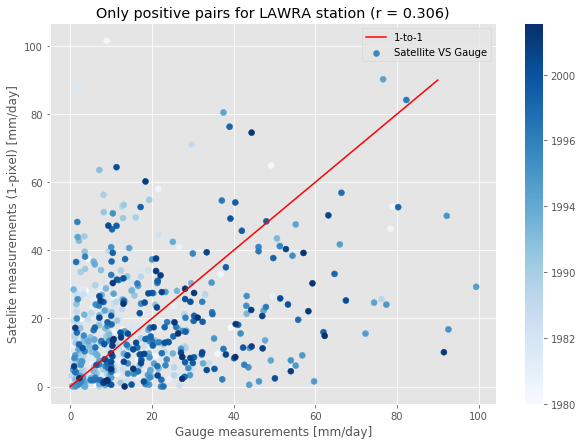

In [44]:
LAWRAtrainPOS = LAWRAtrain[(LAWRAtrain['g[mm]'] > 0.0) & (LAWRAtrain['sat[mm]'] > 0.0)]

rho = LAWRAtrainPOS['g[mm]'].corr(LAWRAtrainPOS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(LAWRAtrainPOS['g[mm]'], LAWRAtrainPOS['sat[mm]'], c=range(len(LAWRAtrainPOS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = LAWRAtrainPOS.index.year[np.arange(0, len(LAWRAtrainPOS), 100)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive pairs for LAWRA station (r = {rho:.3f})');

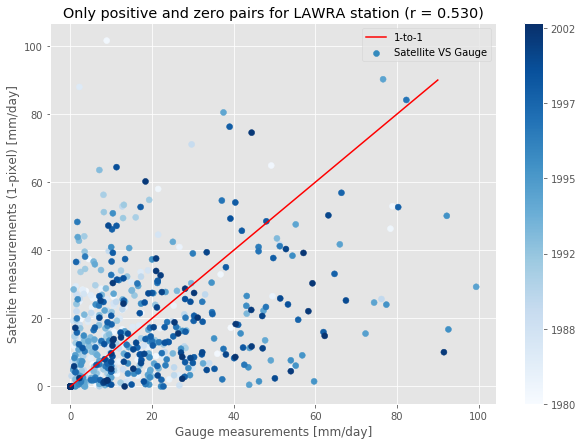

In [45]:
LAWRAtrainPOSandZEROS = LAWRAtrain[((LAWRAtrain['g[mm]'] > 0.0) & (LAWRAtrain['sat[mm]'] > 0.0))  |  ((LAWRAtrain['g[mm]'] == 0.0) & (LAWRAtrain['sat[mm]'] == 0.0))]

rho = LAWRAtrainPOSandZEROS['g[mm]'].corr(LAWRAtrainPOSandZEROS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(LAWRAtrainPOSandZEROS['g[mm]'], LAWRAtrainPOSandZEROS['sat[mm]'], c=range(len(LAWRAtrainPOSandZEROS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = LAWRAtrainPOSandZEROS.index.year[np.arange(0, len(LAWRAtrainPOSandZEROS), 200)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive and zero pairs for LAWRA station (r = {rho:.3f})');

In [46]:
LAWRAtrain['gauge'] = LAWRAtrain['g[mm]']
LAWRAtrain['gauge'][LAWRAtrain['g[mm]'] < thr] = 'No Rain'
LAWRAtrain['gauge'][LAWRAtrain['g[mm]'] >= thr] = 'Rain'

LAWRAtrain['satellite'] = LAWRAtrain['sat[mm]']
LAWRAtrain['satellite'][LAWRAtrain['sat[mm]'] < thr] = 'No Rain'
LAWRAtrain['satellite'][LAWRAtrain['sat[mm]'] >= thr] = 'Rain'

# LAWRAtrain.head(70)

In [47]:
N = len(LAWRAtrain)
hits = len(np.where((LAWRAtrain['satellite'] == 'Rain') & (LAWRAtrain['gauge'] == 'Rain'))[0])
FalseAlarms = len(np.where((LAWRAtrain['satellite'] == 'Rain') & (LAWRAtrain['gauge'] == 'No Rain'))[0])
misses = len(np.where((LAWRAtrain['satellite'] == 'No Rain') & (LAWRAtrain['gauge'] == 'Rain'))[0])
TrueNegatives = len(np.where((LAWRAtrain['satellite'] == 'No Rain') & (LAWRAtrain['gauge'] == 'No Rain'))[0])

POD = hits / (hits + misses)
SR = hits / (hits + FalseAlarms)
FBias = (hits + FalseAlarms) / (hits + misses)
TS = hits / (hits + misses + FalseAlarms)


# print scores
print(f'Probability Of Detection: {POD:.2f}')
print(f'Success Ratio: {SR:.2f}')
print(f'Frequency Bias: {FBias:.2f}')
print(f'Threat Score: {TS:.2f}')

Probability Of Detection: 0.83
Success Ratio: 0.60
Frequency Bias: 1.37
Threat Score: 0.54



               precision    recall  f1-score   support

     No Rain       0.69      0.88      0.77       719
        Rain       0.83      0.60      0.70       704

    accuracy                           0.74      1423
   macro avg       0.76      0.74      0.74      1423
weighted avg       0.76      0.74      0.74      1423



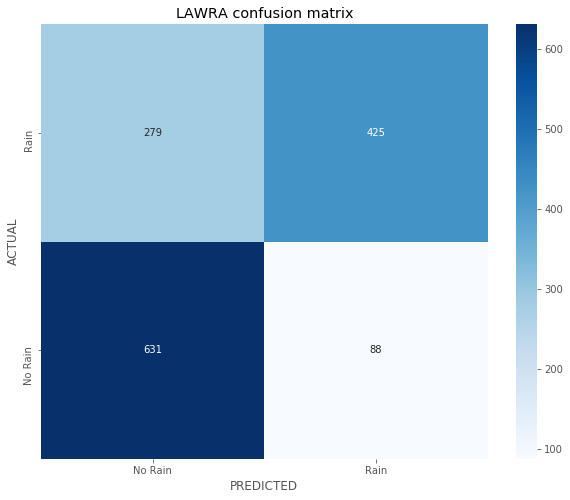

In [48]:
# confusion matrix

conf_matrix = []

labels = ['No Rain', 'Rain']

conf_matrix.append(confusion_matrix(np.array(LAWRAtrain['satellite']), LAWRAtrain['gauge']))
print('\n', classification_report(np.array(LAWRAtrain['satellite']), LAWRAtrain['gauge'], target_names = labels))  

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix[0], annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
ax.set_ylim(0, 2)  # needed for text allignment

plt.title('LAWRA confusion matrix')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

plt.savefig('DataFigures/confusion matrix LAWRA.png')
plt.show()
print('\n');

# 6. NAVRONGO

In [49]:
NAVRONGOtrain = NAVRONGO.merge(NAVRONGOsat1, how='left', left_on=NAVRONGO.index, right_on=NAVRONGOsat1.index)
NAVRONGOtrain.rename(columns = {'key_0': 'Date', 'R[mm]_x':'g[mm]', 'R[mm]_y':'sat[mm]'}, inplace=True)
NAVRONGOtrain.set_index('Date', inplace=True)

NAVRONGOtrain = NAVRONGOtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

NAVRONGOtrain.index = pd.to_datetime(NAVRONGOtrain.index, errors='coerce')


# NAVRONGOtrain

In [50]:
NAVRONGOtrain['g[mm]'] = NAVRONGOtrain['g[mm]'].resample(rule = '3d').sum()
NAVRONGOtrain['sat[mm]'] = NAVRONGOtrain['sat[mm]'].resample(rule = '3d').sum()
NAVRONGOtrain = NAVRONGOtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

# NAVRONGOtrain

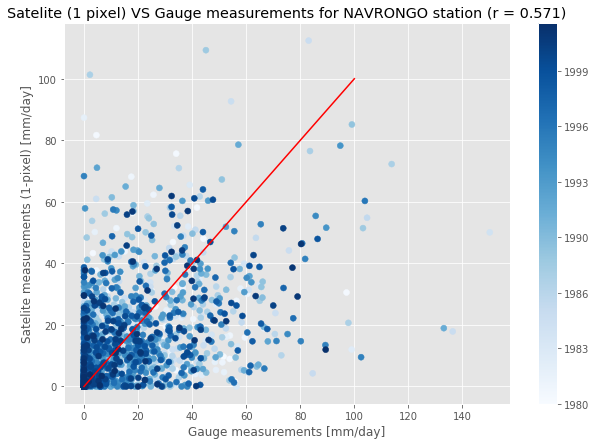

In [51]:
rho = NAVRONGOtrain['g[mm]'].corr(NAVRONGOtrain['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(NAVRONGOtrain['g[mm]'], NAVRONGOtrain['sat[mm]'], c=range(len(NAVRONGOtrain.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 100, 2), np.linspace(0, 100, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = NAVRONGOtrain.index.year[np.arange(0, len(NAVRONGOtrain), 400)]
clb.ax.yaxis.set_ticklabels(new_ticks)



plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Satelite (1 pixel) VS Gauge measurements for NAVRONGO station (r = {rho:.3f})');

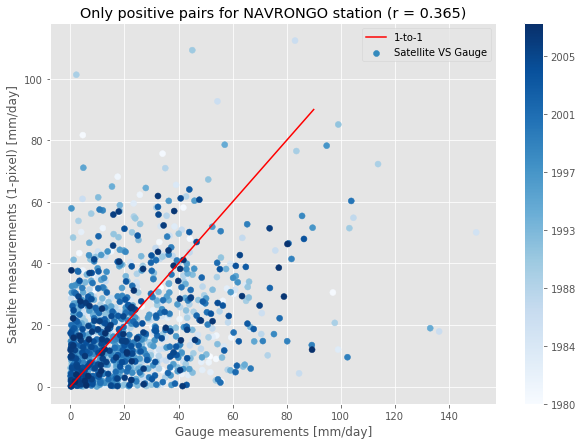

In [52]:
NAVRONGOtrainPOS = NAVRONGOtrain[(NAVRONGOtrain['g[mm]'] > 0.0) & (NAVRONGOtrain['sat[mm]'] > 0.0)]

rho = NAVRONGOtrainPOS['g[mm]'].corr(NAVRONGOtrainPOS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(NAVRONGOtrainPOS['g[mm]'], NAVRONGOtrainPOS['sat[mm]'], c=range(len(NAVRONGOtrainPOS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = NAVRONGOtrainPOS.index.year[np.arange(0, len(NAVRONGOtrainPOS), 200)]
clb.ax.yaxis.set_ticklabels(new_ticks)


plt.legend()

plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive pairs for NAVRONGO station (r = {rho:.3f})');

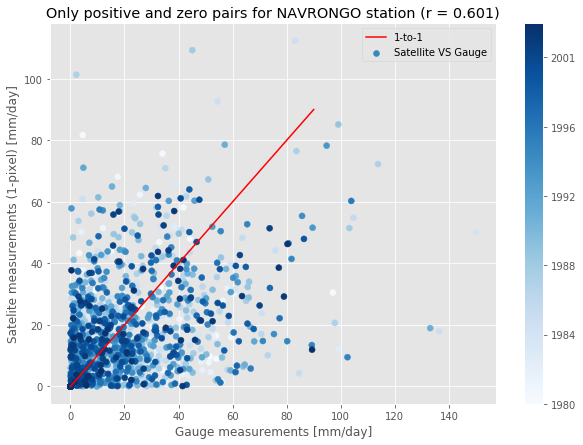

In [53]:
NAVRONGOtrainPOSandZEROS = NAVRONGOtrain[((NAVRONGOtrain['g[mm]'] > 0.0) & (NAVRONGOtrain['sat[mm]'] > 0.0))  |  ((NAVRONGOtrain['g[mm]'] == 0.0) & (NAVRONGOtrain['sat[mm]'] == 0.0))]

rho = NAVRONGOtrainPOSandZEROS['g[mm]'].corr(NAVRONGOtrainPOSandZEROS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(NAVRONGOtrainPOSandZEROS['g[mm]'], NAVRONGOtrainPOSandZEROS['sat[mm]'], c=range(len(NAVRONGOtrainPOSandZEROS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = NAVRONGOtrainPOSandZEROS.index.year[np.arange(0, len(NAVRONGOtrainPOSandZEROS), 400)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive and zero pairs for NAVRONGO station (r = {rho:.3f})');

In [54]:
NAVRONGOtrain['gauge'] = NAVRONGOtrain['g[mm]']
NAVRONGOtrain['gauge'][NAVRONGOtrain['g[mm]'] < thr] = 'No Rain'
NAVRONGOtrain['gauge'][NAVRONGOtrain['g[mm]'] >= thr] = 'Rain'

NAVRONGOtrain['satellite'] = NAVRONGOtrain['sat[mm]']
NAVRONGOtrain['satellite'][NAVRONGOtrain['sat[mm]'] < thr] = 'No Rain'
NAVRONGOtrain['satellite'][NAVRONGOtrain['sat[mm]'] >= thr] = 'Rain'

# NAVRONGOtrain.head(70)

In [55]:
N = len(NAVRONGOtrain)
hits = len(np.where((NAVRONGOtrain['satellite'] == 'Rain') & (NAVRONGOtrain['gauge'] == 'Rain'))[0])
FalseAlarms = len(np.where((NAVRONGOtrain['satellite'] == 'Rain') & (NAVRONGOtrain['gauge'] == 'No Rain'))[0])
misses = len(np.where((NAVRONGOtrain['satellite'] == 'No Rain') & (NAVRONGOtrain['gauge'] == 'Rain'))[0])
TrueNegatives = len(np.where((NAVRONGOtrain['satellite'] == 'No Rain') & (NAVRONGOtrain['gauge'] == 'No Rain'))[0])

POD = hits / (hits + misses)
SR = hits / (hits + FalseAlarms)
FBias = (hits + FalseAlarms) / (hits + misses)
TS = hits / (hits + misses + FalseAlarms)


# print scores
print(f'Probability Of Detection: {POD:.2f}')
print(f'Success Ratio: {SR:.2f}')
print(f'Frequency Bias: {FBias:.2f}')
print(f'Threat Score: {TS:.2f}')

Probability Of Detection: 0.85
Success Ratio: 0.69
Frequency Bias: 1.23
Threat Score: 0.62



               precision    recall  f1-score   support

     No Rain       0.69      0.88      0.77       719
        Rain       0.83      0.60      0.70       704

    accuracy                           0.74      1423
   macro avg       0.76      0.74      0.74      1423
weighted avg       0.76      0.74      0.74      1423



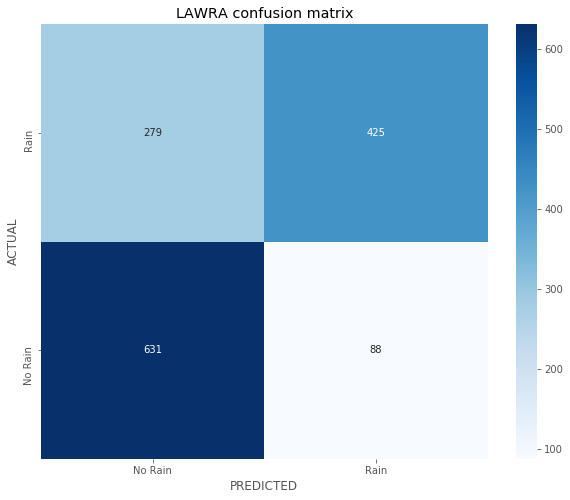

In [56]:
# confusion matrix

conf_matrix = []

labels = ['No Rain', 'Rain']

conf_matrix.append(confusion_matrix(np.array(LAWRAtrain['satellite']), LAWRAtrain['gauge']))
print('\n', classification_report(np.array(LAWRAtrain['satellite']), LAWRAtrain['gauge'], target_names = labels))  

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix[0], annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
ax.set_ylim(0, 2)  # needed for text allignment

plt.title('LAWRA confusion matrix')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

plt.savefig('DataFigures/confusion matrix LAWRA.png')
plt.show()
print('\n');

# 7. OUAHIGOUYA

In [57]:
OUAHIGOUYAtrain = OUAHIGOUYA.merge(OUAHIGOUYAsat1, how='left', left_on=OUAHIGOUYA.index, right_on=OUAHIGOUYAsat1.index)
OUAHIGOUYAtrain.rename(columns = {'key_0': 'Date', 'R[mm]_x':'g[mm]', 'R[mm]_y':'sat[mm]'}, inplace=True)
OUAHIGOUYAtrain.set_index('Date', inplace=True)

OUAHIGOUYAtrain = OUAHIGOUYAtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

OUAHIGOUYAtrain.index = pd.to_datetime(OUAHIGOUYAtrain.index, errors='coerce')


# OUAHIGOUYAtrain

In [58]:
OUAHIGOUYAtrain['g[mm]'] = OUAHIGOUYAtrain['g[mm]'].resample(rule = '3d').sum()
OUAHIGOUYAtrain['sat[mm]'] = OUAHIGOUYAtrain['sat[mm]'].resample(rule = '3d').sum()
OUAHIGOUYAtrain = OUAHIGOUYAtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

# OUAHIGOUYAtrain

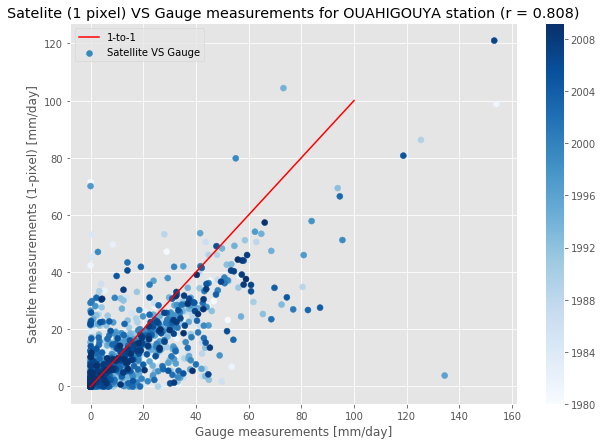

In [59]:
rho = OUAHIGOUYAtrain['g[mm]'].corr(OUAHIGOUYAtrain['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(OUAHIGOUYAtrain['g[mm]'], OUAHIGOUYAtrain['sat[mm]'], c=range(len(OUAHIGOUYAtrain.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 100, 2), np.linspace(0, 100, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = OUAHIGOUYAtrain.index.year[np.arange(0, len(OUAHIGOUYAtrain), 500)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Satelite (1 pixel) VS Gauge measurements for OUAHIGOUYA station (r = {rho:.3f})');

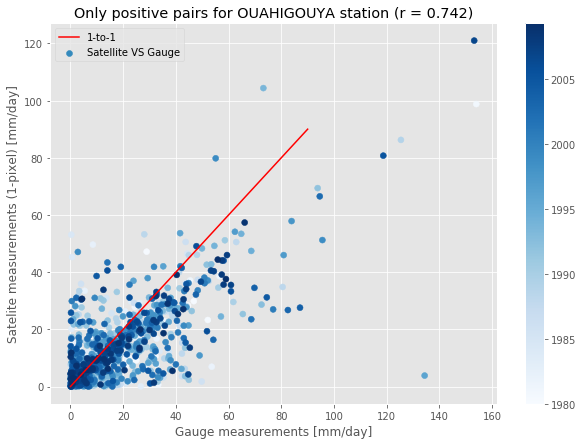

In [60]:
OUAHIGOUYAtrainPOS = OUAHIGOUYAtrain[(OUAHIGOUYAtrain['g[mm]'] > 0.0) & (OUAHIGOUYAtrain['sat[mm]'] > 0.0)]

rho = OUAHIGOUYAtrainPOS['g[mm]'].corr(OUAHIGOUYAtrainPOS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(OUAHIGOUYAtrainPOS['g[mm]'], OUAHIGOUYAtrainPOS['sat[mm]'], c=range(len(OUAHIGOUYAtrainPOS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = OUAHIGOUYAtrainPOS.index.year[np.arange(0, len(OUAHIGOUYAtrainPOS), 200)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive pairs for OUAHIGOUYA station (r = {rho:.3f})');

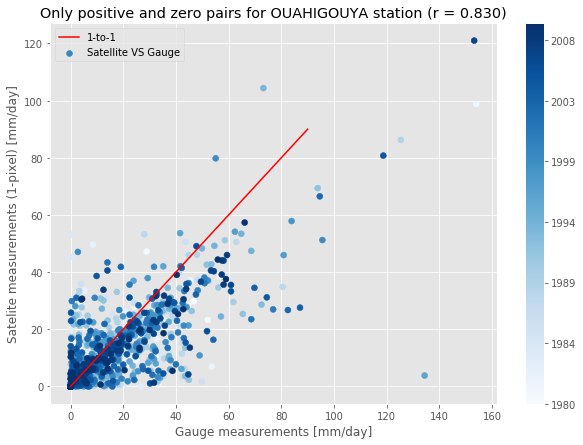

In [61]:
OUAHIGOUYAtrainPOSandZEROS = OUAHIGOUYAtrain[((OUAHIGOUYAtrain['g[mm]'] > 0.0) & (OUAHIGOUYAtrain['sat[mm]'] > 0.0))  |  ((OUAHIGOUYAtrain['g[mm]'] == 0.0) & (OUAHIGOUYAtrain['sat[mm]'] == 0.0))]

rho = OUAHIGOUYAtrainPOSandZEROS['g[mm]'].corr(OUAHIGOUYAtrainPOSandZEROS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(OUAHIGOUYAtrainPOSandZEROS['g[mm]'], OUAHIGOUYAtrainPOSandZEROS['sat[mm]'], c=range(len(OUAHIGOUYAtrainPOSandZEROS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = OUAHIGOUYAtrainPOSandZEROS.index.year[np.arange(0, len(OUAHIGOUYAtrainPOSandZEROS), 500)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive and zero pairs for OUAHIGOUYA station (r = {rho:.3f})');

In [62]:
OUAHIGOUYAtrain['gauge'] = OUAHIGOUYAtrain['g[mm]']
OUAHIGOUYAtrain['gauge'][OUAHIGOUYAtrain['g[mm]'] < thr] = 'No Rain'
OUAHIGOUYAtrain['gauge'][OUAHIGOUYAtrain['g[mm]'] >= thr] = 'Rain'

OUAHIGOUYAtrain['satellite'] = OUAHIGOUYAtrain['sat[mm]']
OUAHIGOUYAtrain['satellite'][OUAHIGOUYAtrain['sat[mm]'] < thr] = 'No Rain'
OUAHIGOUYAtrain['satellite'][OUAHIGOUYAtrain['sat[mm]'] >= thr] = 'Rain'

# OUAHIGOUYAtrain.head(70)

In [63]:
N = len(OUAHIGOUYAtrain)
hits = len(np.where((OUAHIGOUYAtrain['satellite'] == 'Rain') & (OUAHIGOUYAtrain['gauge'] == 'Rain'))[0])
FalseAlarms = len(np.where((OUAHIGOUYAtrain['satellite'] == 'Rain') & (OUAHIGOUYAtrain['gauge'] == 'No Rain'))[0])
misses = len(np.where((OUAHIGOUYAtrain['satellite'] == 'No Rain') & (OUAHIGOUYAtrain['gauge'] == 'Rain'))[0])
TrueNegatives = len(np.where((OUAHIGOUYAtrain['satellite'] == 'No Rain') & (OUAHIGOUYAtrain['gauge'] == 'No Rain'))[0])

POD = hits / (hits + misses)
SR = hits / (hits + FalseAlarms)
FBias = (hits + FalseAlarms) / (hits + misses)
TS = hits / (hits + misses + FalseAlarms)


# print scores
print(f'Probability Of Detection: {POD:.2f}')
print(f'Success Ratio: {SR:.2f}')
print(f'Frequency Bias: {FBias:.2f}')
print(f'Threat Score: {TS:.2f}')

Probability Of Detection: 0.87
Success Ratio: 0.81
Frequency Bias: 1.07
Threat Score: 0.72



               precision    recall  f1-score   support

     No Rain       0.93      0.96      0.95      2697
        Rain       0.87      0.81      0.84       956

    accuracy                           0.92      3653
   macro avg       0.90      0.88      0.89      3653
weighted avg       0.92      0.92      0.92      3653



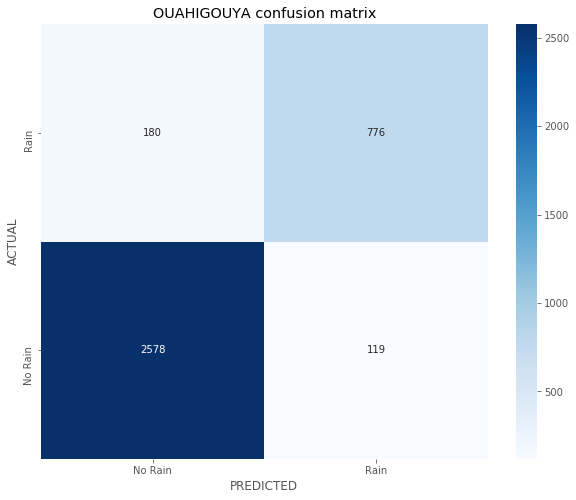

In [64]:
# confusion matrix

conf_matrix = []

labels = ['No Rain', 'Rain']

conf_matrix.append(confusion_matrix(np.array(OUAHIGOUYAtrain['satellite']), OUAHIGOUYAtrain['gauge']))
print('\n', classification_report(np.array(OUAHIGOUYAtrain['satellite']), OUAHIGOUYAtrain['gauge'], target_names = labels))  

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix[0], annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
ax.set_ylim(0, 2)  # needed for text allignment

plt.title('OUAHIGOUYA confusion matrix')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

plt.savefig('DataFigures/confusion matrix OUAHIGOUYA.png')
plt.show()
print('\n');

# 8. TAMALE

In [65]:
TAMALEtrain = TAMALE.merge(TAMALEsat1, how='left', left_on=TAMALE.index, right_on=TAMALEsat1.index)
TAMALEtrain.rename(columns = {'key_0': 'Date', 'R[mm]_x':'g[mm]', 'R[mm]_y':'sat[mm]'}, inplace=True)
TAMALEtrain.set_index('Date', inplace=True)

TAMALEtrain = TAMALEtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

TAMALEtrain.index = pd.to_datetime(TAMALEtrain.index, errors='coerce')


# TAMALEtrain

In [66]:
TAMALEtrain['g[mm]'] = TAMALEtrain['g[mm]'].resample(rule = '3d').sum()
TAMALEtrain['sat[mm]'] = TAMALEtrain['sat[mm]'].resample(rule = '3d').sum()
TAMALEtrain = TAMALEtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

# TAMALEtrain

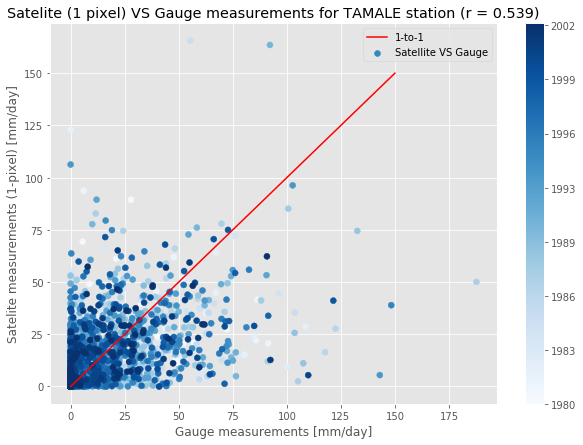

In [67]:
rho = TAMALEtrain['g[mm]'].corr(TAMALEtrain['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(TAMALEtrain['g[mm]'], TAMALEtrain['sat[mm]'], c=range(len(TAMALEtrain.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 150, 2), np.linspace(0, 150, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TAMALEtrain.index.year[np.arange(0, len(TAMALEtrain), 400)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Satelite (1 pixel) VS Gauge measurements for TAMALE station (r = {rho:.3f})');

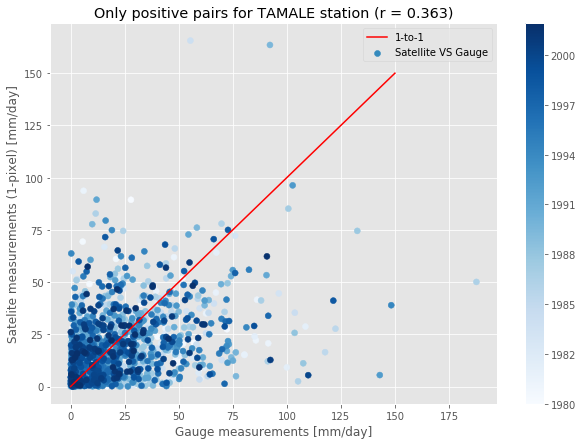

In [68]:
TAMALEtrainPOS = TAMALEtrain[(TAMALEtrain['g[mm]'] > 0.0) & (TAMALEtrain['sat[mm]'] > 0.0)]

rho = TAMALEtrainPOS['g[mm]'].corr(TAMALEtrainPOS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(TAMALEtrainPOS['g[mm]'], TAMALEtrainPOS['sat[mm]'], c=range(len(TAMALEtrainPOS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 150, 2), np.linspace(0, 150, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TAMALEtrainPOS.index.year[np.arange(0, len(TAMALEtrainPOS), 150)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive pairs for TAMALE station (r = {rho:.3f})');

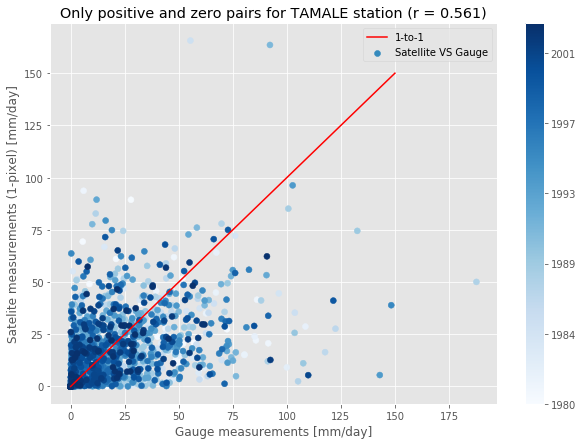

In [69]:
TAMALEtrainPOSandZEROS = TAMALEtrain[((TAMALEtrain['g[mm]'] > 0.0) & (TAMALEtrain['sat[mm]'] > 0.0))  |  ((TAMALEtrain['g[mm]'] == 0.0) & (TAMALEtrain['sat[mm]'] == 0.0))]

rho = TAMALEtrainPOSandZEROS['g[mm]'].corr(TAMALEtrainPOSandZEROS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(TAMALEtrainPOSandZEROS['g[mm]'], TAMALEtrainPOSandZEROS['sat[mm]'], c=range(len(TAMALEtrainPOSandZEROS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 150, 2), np.linspace(0, 150, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = TAMALEtrainPOSandZEROS.index.year[np.arange(0, len(TAMALEtrainPOSandZEROS), 400)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive and zero pairs for TAMALE station (r = {rho:.3f})');

In [70]:
TAMALEtrain['gauge'] = TAMALEtrain['g[mm]']
TAMALEtrain['gauge'][TAMALEtrain['g[mm]'] < thr] = 'No Rain'
TAMALEtrain['gauge'][TAMALEtrain['g[mm]'] >= thr] = 'Rain'

TAMALEtrain['satellite'] = TAMALEtrain['sat[mm]']
TAMALEtrain['satellite'][TAMALEtrain['sat[mm]'] < thr] = 'No Rain'
TAMALEtrain['satellite'][TAMALEtrain['sat[mm]'] >= thr] = 'Rain'

# TAMALEtrain.head(70)

In [71]:
N = len(TAMALEtrain)
hits = len(np.where((TAMALEtrain['satellite'] == 'Rain') & (TAMALEtrain['gauge'] == 'Rain'))[0])
FalseAlarms = len(np.where((TAMALEtrain['satellite'] == 'Rain') & (TAMALEtrain['gauge'] == 'No Rain'))[0])
misses = len(np.where((TAMALEtrain['satellite'] == 'No Rain') & (TAMALEtrain['gauge'] == 'Rain'))[0])
TrueNegatives = len(np.where((TAMALEtrain['satellite'] == 'No Rain') & (TAMALEtrain['gauge'] == 'No Rain'))[0])

POD = hits / (hits + misses)
SR = hits / (hits + FalseAlarms)
FBias = (hits + FalseAlarms) / (hits + misses)
TS = hits / (hits + misses + FalseAlarms)


# print scores
print(f'Probability Of Detection: {POD:.2f}')
print(f'Success Ratio: {SR:.2f}')
print(f'Frequency Bias: {FBias:.2f}')
print(f'Threat Score: {TS:.2f}')

Probability Of Detection: 0.89
Success Ratio: 0.66
Frequency Bias: 1.35
Threat Score: 0.61



               precision    recall  f1-score   support

     No Rain       0.74      0.92      0.82      1824
        Rain       0.89      0.66      0.75      1697

    accuracy                           0.79      3521
   macro avg       0.81      0.79      0.79      3521
weighted avg       0.81      0.79      0.79      3521



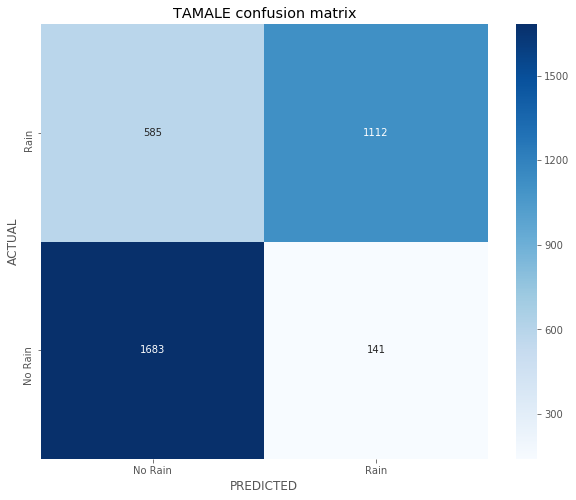

In [72]:
# confusion matrix

conf_matrix = []

labels = ['No Rain', 'Rain']

conf_matrix.append(confusion_matrix(np.array(TAMALEtrain['satellite']), TAMALEtrain['gauge']))
print('\n', classification_report(np.array(TAMALEtrain['satellite']), TAMALEtrain['gauge'], target_names = labels))  

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix[0], annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
ax.set_ylim(0, 2)  # needed for text allignment

plt.title('TAMALE confusion matrix')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

plt.savefig('DataFigures/confusion matrix TAMALE.png')
plt.show()
print('\n');

# 9. WA

In [73]:
WAtrain = WA.merge(WAsat1, how='left', left_on=WA.index, right_on=WAsat1.index)
WAtrain.rename(columns = {'key_0': 'Date', 'R[mm]_x':'g[mm]', 'R[mm]_y':'sat[mm]'}, inplace=True)
WAtrain.set_index('Date', inplace=True)

WAtrain = WAtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

WAtrain.index = pd.to_datetime(WAtrain.index, errors='coerce')


# WAtrain

In [74]:
WAtrain['g[mm]'] = WAtrain['g[mm]'].resample(rule = '3d').sum()
WAtrain['sat[mm]'] = WAtrain['sat[mm]'].resample(rule = '3d').sum()
WAtrain = WAtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

# WAtrain

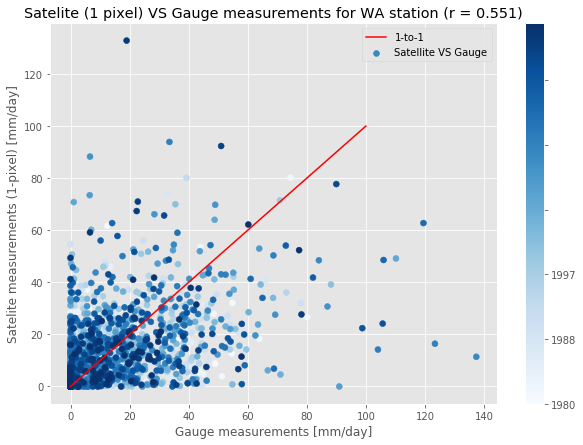

In [75]:
rho = WAtrain['g[mm]'].corr(WAtrain['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(WAtrain['g[mm]'], WAtrain['sat[mm]'], c=range(len(WAtrain.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 100, 2), np.linspace(0, 100, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = WAtrain.index.year[np.arange(0, len(WAtrain), 1000)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Satelite (1 pixel) VS Gauge measurements for WA station (r = {rho:.3f})');

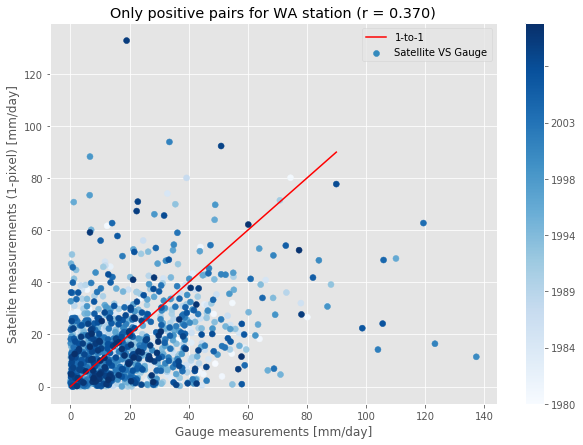

In [76]:
WAtrainPOS = WAtrain[(WAtrain['g[mm]'] > 0.0) & (WAtrain['sat[mm]'] > 0.0)]

rho = WAtrainPOS['g[mm]'].corr(WAtrainPOS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(WAtrainPOS['g[mm]'], WAtrainPOS['sat[mm]'], c=range(len(WAtrainPOS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = WAtrainPOS.index.year[np.arange(0, len(WAtrainPOS), 250)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive pairs for WA station (r = {rho:.3f})');

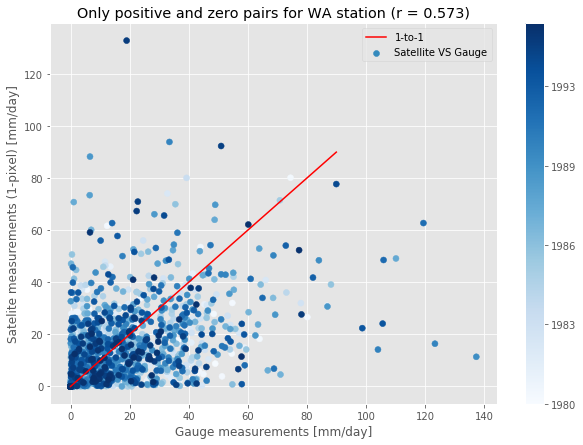

In [77]:
WAtrainPOSandZEROS = WAtrain[((WAtrain['g[mm]'] > 0.0) & (WAtrain['sat[mm]'] > 0.0))  |  ((WAtrain['g[mm]'] == 0.0) & (WAtrain['sat[mm]'] == 0.0))]

rho = WAtrainPOSandZEROS['g[mm]'].corr(WAtrainPOSandZEROS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(WAtrainPOSandZEROS['g[mm]'], WAtrainPOSandZEROS['sat[mm]'], c=range(len(WAtrainPOSandZEROS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = WAtrainPOSandZEROS.index.year[np.arange(0, len(WAtrainPOSandZEROS), 300)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive and zero pairs for WA station (r = {rho:.3f})');

In [78]:
WAtrain['gauge'] = WAtrain['g[mm]']
WAtrain['gauge'][WAtrain['g[mm]'] < thr] = 'No Rain'
WAtrain['gauge'][WAtrain['g[mm]'] >= thr] = 'Rain'

WAtrain['satellite'] = WAtrain['sat[mm]']
WAtrain['satellite'][WAtrain['sat[mm]'] < thr] = 'No Rain'
WAtrain['satellite'][WAtrain['sat[mm]'] >= thr] = 'Rain'

# WAtrain.head(70)

In [79]:
N = len(WAtrain)
hits = len(np.where((WAtrain['satellite'] == 'Rain') & (WAtrain['gauge'] == 'Rain'))[0])
FalseAlarms = len(np.where((WAtrain['satellite'] == 'Rain') & (WAtrain['gauge'] == 'No Rain'))[0])
misses = len(np.where((WAtrain['satellite'] == 'No Rain') & (WAtrain['gauge'] == 'Rain'))[0])
TrueNegatives = len(np.where((WAtrain['satellite'] == 'No Rain') & (WAtrain['gauge'] == 'No Rain'))[0])

POD = hits / (hits + misses)
SR = hits / (hits + FalseAlarms)
FBias = (hits + FalseAlarms) / (hits + misses)
TS = hits / (hits + misses + FalseAlarms)


# print scores
print(f'Probability Of Detection: {POD:.2f}')
print(f'Success Ratio: {SR:.2f}')
print(f'Frequency Bias: {FBias:.2f}')
print(f'Threat Score: {TS:.2f}')

Probability Of Detection: 0.86
Success Ratio: 0.70
Frequency Bias: 1.22
Threat Score: 0.63



               precision    recall  f1-score   support

     No Rain       0.78      0.90      0.84      1582
        Rain       0.86      0.70      0.77      1360

    accuracy                           0.81      2942
   macro avg       0.82      0.80      0.80      2942
weighted avg       0.82      0.81      0.81      2942



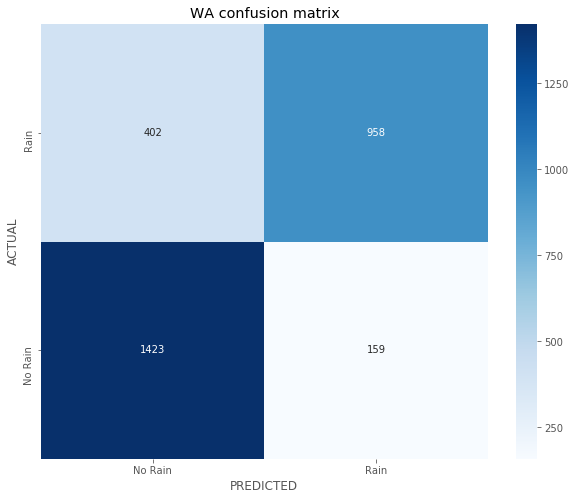

In [80]:
# confusion matrix

conf_matrix = []

labels = ['No Rain', 'Rain']

conf_matrix.append(confusion_matrix(np.array(WAtrain['satellite']), WAtrain['gauge']))
print('\n', classification_report(np.array(WAtrain['satellite']), WAtrain['gauge'], target_names = labels))  

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix[0], annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
ax.set_ylim(0, 2)  # needed for text allignment

plt.title('WA confusion matrix')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

plt.savefig('DataFigures/confusion matrix WA.png')
plt.show()
print('\n');

# 10. ZUARUNGU

In [81]:
ZUARUNGUtrain = ZUARUNGU.merge(ZUARUNGUsat1, how='left', left_on=ZUARUNGU.index, right_on=ZUARUNGUsat1.index)
ZUARUNGUtrain.rename(columns = {'key_0': 'Date', 'R[mm]_x':'g[mm]', 'R[mm]_y':'sat[mm]'}, inplace=True)
ZUARUNGUtrain.set_index('Date', inplace=True)

ZUARUNGUtrain = ZUARUNGUtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

ZUARUNGUtrain.index = pd.to_datetime(ZUARUNGUtrain.index, errors='coerce')


# ZUARUNGUtrain

In [82]:
ZUARUNGUtrain['g[mm]'] = ZUARUNGUtrain['g[mm]'].resample(rule = '3d').sum()
ZUARUNGUtrain['sat[mm]'] = ZUARUNGUtrain['sat[mm]'].resample(rule = '3d').sum()
ZUARUNGUtrain = ZUARUNGUtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values

# ZUARUNGUtrain

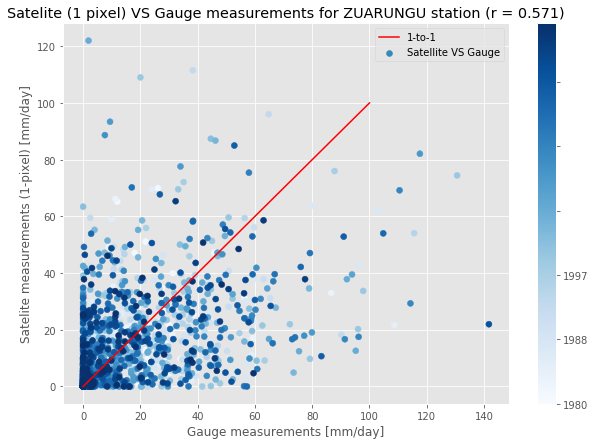

In [83]:
rho = ZUARUNGUtrain['g[mm]'].corr(ZUARUNGUtrain['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(ZUARUNGUtrain['g[mm]'], ZUARUNGUtrain['sat[mm]'], c=range(len(ZUARUNGUtrain.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 100, 2), np.linspace(0, 100, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = ZUARUNGUtrain.index.year[np.arange(0, len(ZUARUNGUtrain), 1000)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Satelite (1 pixel) VS Gauge measurements for ZUARUNGU station (r = {rho:.3f})');

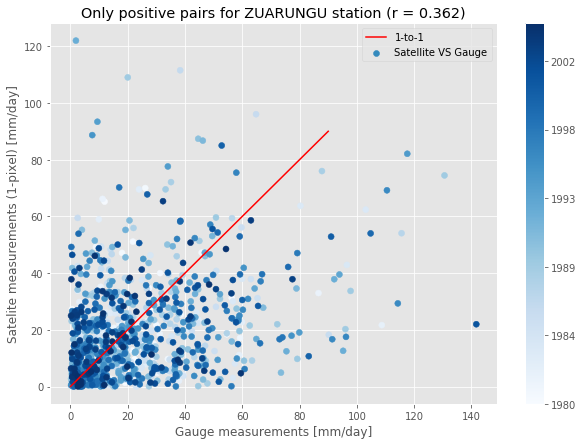

In [84]:
ZUARUNGUtrainPOS = ZUARUNGUtrain[(ZUARUNGUtrain['g[mm]'] > 0.0) & (ZUARUNGUtrain['sat[mm]'] > 0.0)]

rho = ZUARUNGUtrainPOS['g[mm]'].corr(ZUARUNGUtrainPOS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(ZUARUNGUtrainPOS['g[mm]'], ZUARUNGUtrainPOS['sat[mm]'], c=range(len(ZUARUNGUtrainPOS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = ZUARUNGUtrainPOS.index.year[np.arange(0, len(ZUARUNGUtrainPOS), 200)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive pairs for ZUARUNGU station (r = {rho:.3f})');

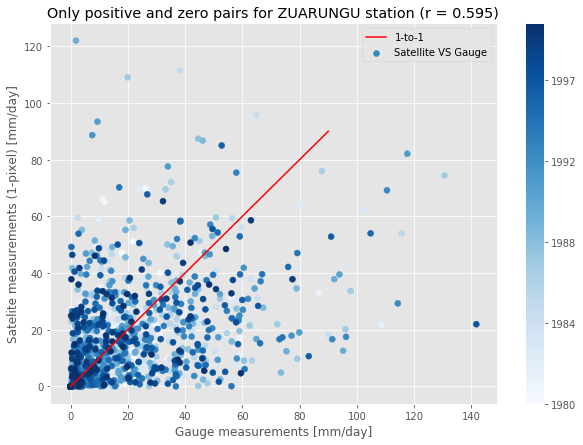

In [85]:
ZUARUNGUtrainPOSandZEROS = ZUARUNGUtrain[((ZUARUNGUtrain['g[mm]'] > 0.0) & (ZUARUNGUtrain['sat[mm]'] > 0.0))  |  ((ZUARUNGUtrain['g[mm]'] == 0.0) & (ZUARUNGUtrain['sat[mm]'] == 0.0))]

rho = ZUARUNGUtrainPOSandZEROS['g[mm]'].corr(ZUARUNGUtrainPOSandZEROS['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.scatter(ZUARUNGUtrainPOSandZEROS['g[mm]'], ZUARUNGUtrainPOSandZEROS['sat[mm]'], c=range(len(ZUARUNGUtrainPOSandZEROS.index)), cmap="Blues", label='Satellite VS Gauge')
plt.colorbar()
plt.plot(np.linspace(0, 90, 2), np.linspace(0, 90, 2), 'r', label='1-to-1')

# set the date ticks
clb = plt.gci().colorbar # get the colorbar artist
new_ticks = ZUARUNGUtrainPOSandZEROS.index.year[np.arange(0, len(ZUARUNGUtrainPOSandZEROS), 400)]
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.legend()


plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Only positive and zero pairs for ZUARUNGU station (r = {rho:.3f})');

In [86]:
ZUARUNGUtrain['gauge'] = ZUARUNGUtrain['g[mm]']
ZUARUNGUtrain['gauge'][ZUARUNGUtrain['g[mm]'] < thr] = 'No Rain'
ZUARUNGUtrain['gauge'][ZUARUNGUtrain['g[mm]'] >= thr] = 'Rain'

ZUARUNGUtrain['satellite'] = ZUARUNGUtrain['sat[mm]']
ZUARUNGUtrain['satellite'][ZUARUNGUtrain['sat[mm]'] < thr] = 'No Rain'
ZUARUNGUtrain['satellite'][ZUARUNGUtrain['sat[mm]'] >= thr] = 'Rain'

# ZUARUNGUtrain.head(70)

In [87]:
N = len(ZUARUNGUtrain)
hits = len(np.where((ZUARUNGUtrain['satellite'] == 'Rain') & (ZUARUNGUtrain['gauge'] == 'Rain'))[0])
FalseAlarms = len(np.where((ZUARUNGUtrain['satellite'] == 'Rain') & (ZUARUNGUtrain['gauge'] == 'No Rain'))[0])
misses = len(np.where((ZUARUNGUtrain['satellite'] == 'No Rain') & (ZUARUNGUtrain['gauge'] == 'Rain'))[0])
TrueNegatives = len(np.where((ZUARUNGUtrain['satellite'] == 'No Rain') & (ZUARUNGUtrain['gauge'] == 'No Rain'))[0])

POD = hits / (hits + misses)
SR = hits / (hits + FalseAlarms)
FBias = (hits + FalseAlarms) / (hits + misses)
TS = hits / (hits + misses + FalseAlarms)


# print scores
print(f'Probability Of Detection: {POD:.2f}')
print(f'Success Ratio: {SR:.2f}')
print(f'Frequency Bias: {FBias:.2f}')
print(f'Threat Score: {TS:.2f}')

Probability Of Detection: 0.85
Success Ratio: 0.71
Frequency Bias: 1.20
Threat Score: 0.63



               precision    recall  f1-score   support

     No Rain       0.83      0.92      0.87      1785
        Rain       0.85      0.71      0.77      1169

    accuracy                           0.83      2954
   macro avg       0.84      0.81      0.82      2954
weighted avg       0.84      0.83      0.83      2954



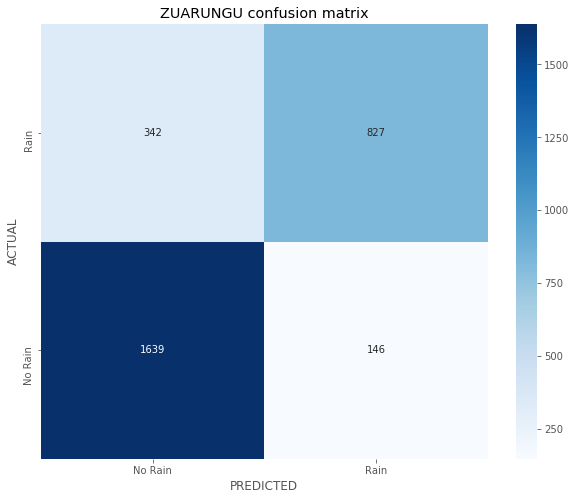

In [88]:
# confusion matrix

conf_matrix = []

labels = ['No Rain', 'Rain']

conf_matrix.append(confusion_matrix(np.array(ZUARUNGUtrain['satellite']), ZUARUNGUtrain['gauge']))
print('\n', classification_report(np.array(ZUARUNGUtrain['satellite']), ZUARUNGUtrain['gauge'], target_names = labels))  

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix[0], annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
ax.set_ylim(0, 2)  # needed for text allignment

plt.title('ZUARUNGU confusion matrix')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

plt.savefig('DataFigures/confusion matrix ZUARUNGU.png')
plt.show()
print('\n');

# 11. ANIABISI

In [76]:
ANIABISItrain = ANIABISI.merge(ANIABISIsat1, how='left', left_on=ANIABISI.index, right_on=ANIABISIsat1.index)
ANIABISItrain.rename(columns = {'key_0': 'Date', 'R[mm]_x':'g[mm]', 'R[mm]_y':'sat[mm]'}, inplace=True)
ANIABISItrain.set_index('Date', inplace=True)

ANIABISItrain = ANIABISItrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values


# ANIABISItrain

,g[mm],sat[mm]
Date,,
2014-06-04,0.00,1.35
2014-06-05,1.25,2.53
2014-06-06,9.05,9.76
2014-06-07,0.00,0.00
2014-06-08,0.00,0.00
...,...,...
2015-12-27,0.00,0.00
2015-12-28,0.00,0.00
2015-12-29,0.00,0.00


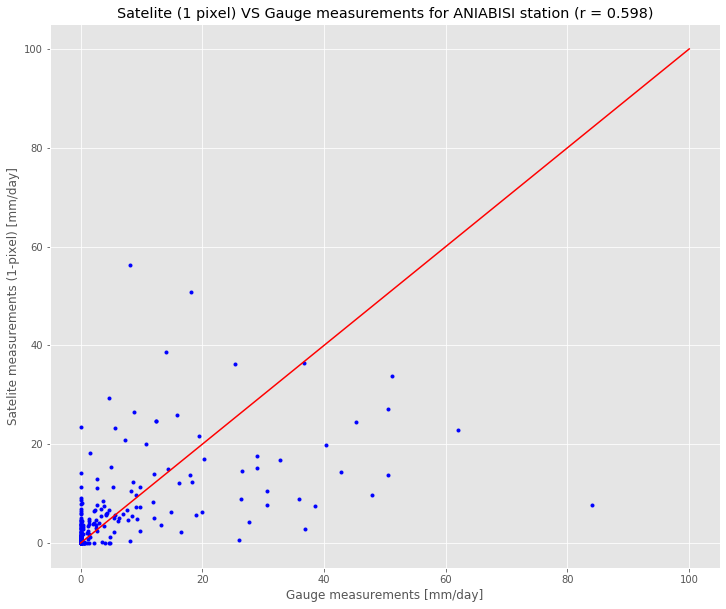

In [77]:
rho = ANIABISItrain['g[mm]'].corr(ANIABISItrain['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.plot(ANIABISItrain['g[mm]'], ANIABISItrain['sat[mm]'], 'b.')
plt.plot(np.linspace(0, 100, 2), np.linspace(0, 100, 2), 'r')

plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Satelite (1 pixel) VS Gauge measurements for ANIABISI station (r = {rho:.3f})')

DataFigures/Satelite (1 pixel) VS Gauge measurements for ANIABISI station.png');

# 12. POUDRI

In [78]:
POUDRItrain = POUDRI.merge(POUDRIsat1, how='left', left_on=POUDRI.index, right_on=POUDRIsat1.index)
POUDRItrain.rename(columns = {'key_0': 'Date', 'R[mm]_x':'g[mm]', 'R[mm]_y':'sat[mm]'}, inplace=True)
POUDRItrain.set_index('Date', inplace=True)

POUDRItrain = POUDRItrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values


# POUDRItrain

,g[mm],sat[mm]
Date,,
2013-06-25,0.90,3.58
2013-06-26,0.00,0.50
2013-06-27,31.55,15.47
2013-06-28,0.00,4.24
2013-06-29,12.45,16.73
...,...,...
2015-12-27,0.00,0.00
2015-12-28,0.05,0.00
2015-12-29,0.00,0.00


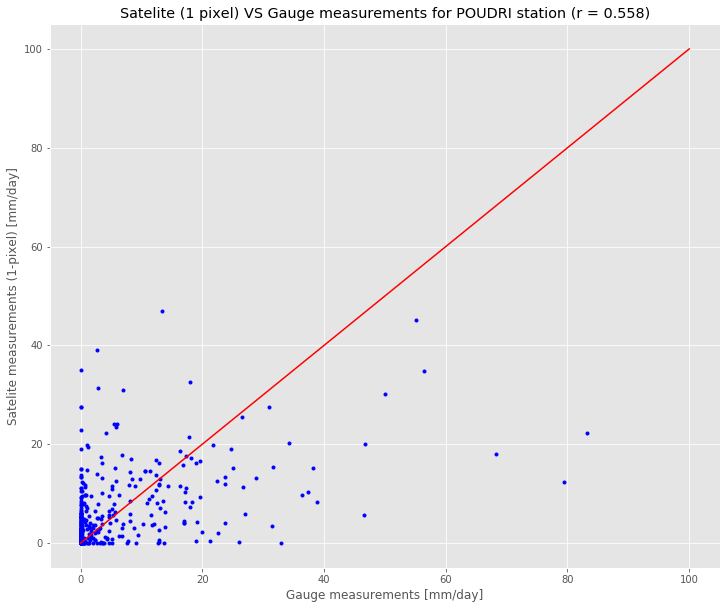

In [79]:
rho = POUDRItrain['g[mm]'].corr(POUDRItrain['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.plot(POUDRItrain['g[mm]'], POUDRItrain['sat[mm]'], 'b.')
plt.plot(np.linspace(0, 100, 2), np.linspace(0, 100, 2), 'r')

plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Satelite (1 pixel) VS Gauge measurements for POUDRI station (r = {rho:.3f})')

DataFigures/Satelite (1 pixel) VS Gauge measurements for POUDRI station.png');

# 13. LARE

In [81]:
LAREtrain = LARE.merge(LAREsat1, how='left', left_on=LARE.index, right_on=LAREsat1.index)
LAREtrain.rename(columns = {'key_0': 'Date', 'R[mm]_x':'g[mm]', 'R[mm]_y':'sat[mm]'}, inplace=True)
LAREtrain.set_index('Date', inplace=True)

LAREtrain = LAREtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values


LAREtrain

,g[mm],sat[mm]
Date,,
2013-09-26,0.0,0.00
2013-09-27,0.2,10.69
2013-09-28,1.6,8.57
2013-09-29,0.0,1.46
2013-09-30,33.4,10.92
...,...,...
2015-12-27,0.0,0.00
2015-12-28,0.0,0.00
2015-12-29,0.0,0.00


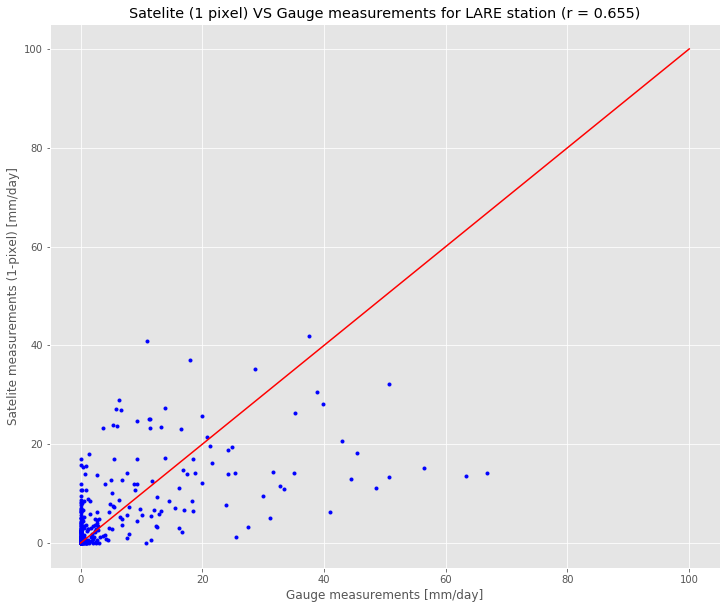

In [82]:
rho = LAREtrain['g[mm]'].corr(LAREtrain['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.plot(LAREtrain['g[mm]'], LAREtrain['sat[mm]'], 'b.')
plt.plot(np.linspace(0, 100, 2), np.linspace(0, 100, 2), 'r')

plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Satelite (1 pixel) VS Gauge measurements for LARE station (r = {rho:.3f})')

DataFigures/Satelite (1 pixel) VS Gauge measurements for LARE station.png');

# 14. YABOGANE

In [83]:
YABOGANEtrain = YABOGANE.merge(YABOGANEsat1, how='left', left_on=YABOGANE.index, right_on=YABOGANEsat1.index)
YABOGANEtrain.rename(columns = {'key_0': 'Date', 'R[mm]_x':'g[mm]', 'R[mm]_y':'sat[mm]'}, inplace=True)
YABOGANEtrain.set_index('Date', inplace=True)

YABOGANEtrain = YABOGANEtrain.dropna(axis=0, how='any')  # remove 2017 where satelite has no values


YABOGANEtrain

,g[mm],sat[mm]
Date,,
2012-10-01,0.00,0.10
2012-10-02,0.45,3.32
2012-10-03,0.00,1.05
2012-10-04,2.80,3.50
2012-10-05,0.00,1.58
...,...,...
2015-12-27,0.00,0.00
2015-12-28,0.00,0.00
2015-12-29,0.00,0.00


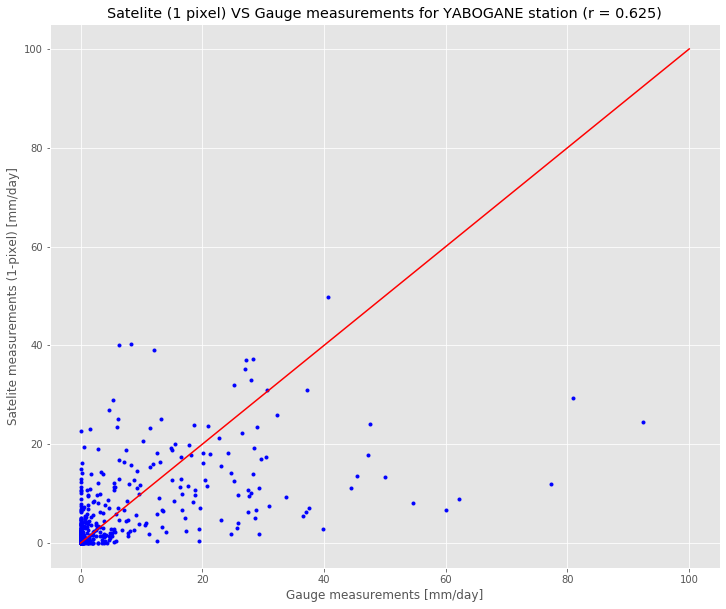

In [84]:
rho = YABOGANEtrain['g[mm]'].corr(YABOGANEtrain['sat[mm]'])

plt.figure(figsize=(10, 7))

plt.plot(YABOGANEtrain['g[mm]'], YABOGANEtrain['sat[mm]'], 'b.')
plt.plot(np.linspace(0, 100, 2), np.linspace(0, 100, 2), 'r')

plt.ylabel('Satelite measurements (1-pixel) [mm/day]')
plt.xlabel('Gauge measurements [mm/day]')

plt.title(f'Satelite (1 pixel) VS Gauge measurements for YABOGANE station (r = {rho:.3f})')

DataFigures/Satelite (1 pixel) VS Gauge measurements for YABOGANE station.png');

# Rainfall Occurence Modeling
Simple classification problem with the 3-day satellite values as input and 'Rain' of 'No Rain' as labels

In [6]:
# import

from scipy.stats import norm
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import rankdata

import scipy.spatial
from itertools import combinations
from scipy.spatial.distance import pdist
from scipy import optimize

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
# load the 9-pixel .csv 

TILLABERItrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\TILLABERItrainTable9.csv", index_col=0)
TOBREtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\TOBREtrainTable9.csv", index_col=0)
TARAtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\TARAtrainTable9.csv", index_col=0)
AGOUFOUtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\AGOUFOUtrainTable9.csv", index_col=0)
LAWRAtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\LAWRAtrainTable9.csv", index_col=0)
# NAVRONGOtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\\NAVRONGOtrainTable9.csv", index_col=0)
OUAHIGOUYAtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\OUAHIGOUYAtrainTable9.csv", index_col=0)
# TAMALEtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\TAMALEtrainTable9.csv", index_col=0)
# WAtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\WAtrainTable9.csv", index_col=0)
# ZUARUNGUtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\ZUARUNGUtrainTable9.csv", index_col=0)
# ANIABISItrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\ANIABISItrainTable9.csv", index_col=0)
# POUDRItrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\POUDRItrainTable9.csv", index_col=0)
# LAREtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\LAREtrainTable9.csv", index_col=0)
# YABOGANEtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\YABOGANEtrainTable9.csv", index_col=0)

# TARAtrainTable9.head(1290)

## FIrst try for TARA station

In [21]:
# read
TARAtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\TARAtrainTable9.csv", index_col=0)
TARAtrainTable9.index = pd.to_datetime(TARAtrainTable9.index, errors='coerce')

# let's try the regression only from APRIL to OCTOBER
TARAtrainTable9 = TARAtrainTable9[TARAtrainTable9.index.month.isin([5, 6, 7, 8])]
thr = 1.00  # 1mm/day


# transform to 3-day values
TARAtrainTable9 = TARAtrainTable9.resample(rule = '3d').sum()
TARAtrainTable9 = TARAtrainTable9.dropna(axis=0, how='any')
TARAtrainTable9 = TARAtrainTable9[TARAtrainTable9.index.month.isin([5, 6, 7, 8])]
thr = 3.0  # 3mm threshold for 3 days



# to training data
data = TARAtrainTable9.to_numpy()

y = data[:, 0]  # Rain/NoRain in gauges (regressand)
X = data[:, 1:10]  # satellite closer-pixel value time-series (regressor)

# 1 for rain and zero for no rain
y[y <= thr] = 0.0  # this should go first because 1 < thr
y[y >= thr] = 1.0

print(X.shape, y.shape)

(533, 9) (533,)


In [22]:
# # train, validation and test datasets

# X_tra, X_tst, y_tra, y_tst = train_test_split(X, y, test_size = int(np.round(0.15 * len(X))), random_state = None)  # I set random_state = None because we need the sequence
# X_tra, X_val, y_tra, y_val = train_test_split(X_tra, y_tra, test_size = int(np.round(0.15 * len(X))), random_state = None)  # I set random_state = None because we need the sequence

# for name, x, yh in zip(['Training','Validation','Test'], [X_tra, X_val, X_tst], [y_tra, y_val, y_tst]):
#     print(f'The {name} dataset is {len(x)} rows long and contains {sum(yh) / len(yh) * 100:.1f}% rainy days.')

In [23]:
# ONLY train and test datasets

X_tra, X_tst, y_tra, y_tst = train_test_split(X, y, test_size = int(np.round(0.2 * len(X))), random_state = None)  # I set random_state = None because we need the sequence

for name, x, yh in zip(['Training','Test'], [X_tra, X_tst], [y_tra, y_tst]):
    print(f'The {name} dataset is {len(x)} rows long and contains {sum(yh) / len(yh) * 100:.1f}% rainy days.')

The Training dataset is 426 rows long and contains 34.0% rainy days.
The Test dataset is 107 rows long and contains 30.8% rainy days.


### 1. Logistic Regression model

In [24]:
# fit LogReg model

LogReg = LogisticRegression(fit_intercept = True)  # with intercept better performance
LogReg.fit(X_tra ,y_tra)

est_coefficients = [LogReg.intercept_.tolist()[0]] + LogReg.coef_.tolist()[0]

names = ['Intercept', 
         'UpperLeft pixel',
         'UpperCenter pixel',
         'UpperRight pixel',
         'MiddleLeft pixel',
         'MiddleCenter pixel',
         'MiddleRight pixel', 
         'LowerLeft pixel',
         'LowerCenter pixel',
         'LowerRight pixel'] 

for i, coef in enumerate(est_coefficients):
    print(f'coefficient {names[i]} = {coef:.3f}')

coefficient Intercept = -2.196
coefficient UpperLeft pixel = -0.468
coefficient UpperCenter pixel = -0.125
coefficient UpperRight pixel = 0.398
coefficient MiddleLeft pixel = 0.367
coefficient MiddleCenter pixel = 0.056
coefficient MiddleRight pixel = -0.099
coefficient LowerLeft pixel = -0.014
coefficient LowerCenter pixel = -0.022
coefficient LowerRight pixel = 0.193


In [25]:
# model performance

# score is defined as: (fraction of correct predictions): correct predictions / total number of data points

# score
scTrain = LogReg.score(X_tra, y_tra)
# scVal = LogReg.score(X_val, y_val)
scTest = LogReg.score(X_tst, y_tst)


# present score

print('Score')
print('--'*10)
print(f'Training: {scTrain:.3f}')
# print(f'Validation: {scVal:.3f}')
print(f'Test: {scTest:.3f}')

Score
--------------------
Training: 0.838
Test: 0.888


In [26]:
# Nevertheless, 

y_mod = LogReg.predict(X)

print('The model predicted', sum(y_mod), 'rainy days.')
print(' ')
print('There were actually', sum(y), 'rainy days.')

The model predicted 145.0 rainy days.
 
There were actually 178.0 rainy days.


### 2. Gaussian Naive Bayes model

In [27]:
# fit Gaussian Naive Bayes model

gnb = GaussianNB()
gnb.fit(X_tra ,y_tra)

# model performance

# score is defined as: (fraction of correct predictions): correct predictions / total number of data points

# score
scTrain = gnb.score(X_tra, y_tra)
# scVal = gnb.score(X_val, y_val)
scTest = gnb.score(X_tst, y_tst)


# present score

print('Score')
print('--'*10)
print(f'Training: {scTrain:.3f}')
# print(f'Validation: {scVal:.3f}')
print(f'Test: {scTest:.3f}')

Score
--------------------
Training: 0.817
Test: 0.879


In [28]:
# Nevertheless, 

y_mod = gnb.predict(X)

print('The model predicted', sum(y_mod), 'rainy days.')
print(' ')
print('There were actually', sum(y), 'rainy days.')

The model predicted 143.0 rainy days.
 
There were actually 178.0 rainy days.


### 3. Random Forrest model

In [29]:
# fit RF model

rfc = RandomForestClassifier(bootstrap = False)
rfc.fit(X_tra ,y_tra)

# model performance

# score is defined as: (fraction of correct predictions): correct predictions / total number of data points

# score
scTrain = rfc.score(X_tra, y_tra)
# scVal = rfc.score(X_val, y_val)
scTest = rfc.score(X_tst, y_tst)


# present score

print('Score')
print('--'*10)
print(f'Training: {scTrain:.3f}')
# print(f'Validation: {scVal:.3f}')
print(f'Test: {scTest:.3f}')

Score
--------------------
Training: 0.998
Test: 0.813


In [30]:
# Nevertheless, 

y_mod = rfc.predict(X)

print('The model predicted', sum(y_mod), 'rainy days.')
print(' ')
print('There were actually', sum(y), 'rainy days.')

The model predicted 179.0 rainy days.
 
There were actually 178.0 rainy days.


### 4. Support Vector Classification (SVC) model

In [31]:
# fit SVC model

svc = LinearSVC(C = 1.0, fit_intercept = True)
svc.fit(X_tra ,y_tra)

# model performance

# score is defined as: (fraction of correct predictions): correct predictions / total number of data points

# score
scTrain = svc.score(X_tra, y_tra)
# scVal = svc.score(X_val, y_val)
scTest = svc.score(X_tst, y_tst)


# present score

print('Score')
print('--'*10)
print(f'Training: {scTrain:.3f}')
# print(f'Validation: {scVal:.3f}')
print(f'Test: {scTest:.3f}')

Score
--------------------
Training: 0.833
Test: 0.897


In [32]:
# Nevertheless, 

y_mod = svc.predict(X)

print('The model predicted', sum(y_mod), 'rainy days.')
print(' ')
print('There were actually', sum(y), 'rainy days.')

The model predicted 146.0 rainy days.
 
There were actually 178.0 rainy days.


## Let's merge datasets and try again

In [52]:
# read TARA, AGOUFOU and OUAHIGOUYA
TARAtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\TARAtrainTable9.csv", index_col=0)
TARAtrainTable9.index = pd.to_datetime(TARAtrainTable9.index, errors='coerce')

AGOUFOUtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\AGOUFOUtrainTable9.csv", index_col=0)
AGOUFOUtrainTable9.index = pd.to_datetime(AGOUFOUtrainTable9.index, errors='coerce')

OUAHIGOUYAtrainTable9 = pd.read_csv("OrganisedData\9-pixelTrainingData\OUAHIGOUYAtrainTable9.csv", index_col=0)
OUAHIGOUYAtrainTable9.index = pd.to_datetime(OUAHIGOUYAtrainTable9.index, errors='coerce')

# merge the datasets

data = pd.concat([TARAtrainTable9, AGOUFOUtrainTable9, OUAHIGOUYAtrainTable9])


# let's try the regression only from APRIL to OCTOBER
data = data[data.index.month.isin([5, 6, 7, 8])]
thr = 1.00  # 1mm/day


# # transform to 3-day values
data = data.resample(rule = '3d').sum()
data = data.dropna(axis=0, how='any')
data = data[data.index.month.isin([5, 6, 7, 8])]
thr = 3.0  # 3mm threshold for 3 days



# # to training data
data = data.to_numpy()

y = data[:, 0]  # Rain/NoRain in gauges (regressand)
X = data[:, 1:10]  # satellite closer-pixel value time-series (regressor)

# 1 for rain and zero for no rain
y[y <= thr] = 0.0  # this should go first because 1 < thr
y[y >= thr] = 1.0

print(X.shape, y.shape)

(1517, 9) (1517,)


In [53]:
# train, validation and test datasets

X_tra, X_tst, y_tra, y_tst = train_test_split(X, y, test_size = int(np.round(0.15 * len(X))), random_state = None)  # I set random_state = None because we need the sequence
X_tra, X_val, y_tra, y_val = train_test_split(X_tra, y_tra, test_size = int(np.round(0.15 * len(X))), random_state = None)  # I set random_state = None because we need the sequence

for name, x, yh in zip(['Training','Validation','Test'], [X_tra, X_val, X_tst], [y_tra, y_val, y_tst]):
    print(f'The {name} dataset is {len(x)} rows long and contains {sum(yh) / len(yh) * 100:.1f}% rainy days.')

The Training dataset is 1061 rows long and contains 54.6% rainy days.
The Validation dataset is 228 rows long and contains 56.6% rainy days.
The Test dataset is 228 rows long and contains 53.9% rainy days.


### 1. Logistic Regression model

In [54]:
# fit LogReg model

LogReg = LogisticRegression(fit_intercept = True)  # with intercept better performance
LogReg.fit(X_tra ,y_tra)

est_coefficients = [LogReg.intercept_.tolist()[0]] + LogReg.coef_.tolist()[0]

names = ['Intercept', 
         'UpperLeft pixel',
         'UpperCenter pixel',
         'UpperRight pixel',
         'MiddleLeft pixel',
         'MiddleCenter pixel',
         'MiddleRight pixel', 
         'LowerLeft pixel',
         'LowerCenter pixel',
         'LowerRight pixel'] 

for i, coef in enumerate(est_coefficients):
    print(f'coefficient {names[i]} = {coef:.3f}')

coefficient Intercept = -1.278
coefficient UpperLeft pixel = -0.203
coefficient UpperCenter pixel = 0.288
coefficient UpperRight pixel = 0.064
coefficient MiddleLeft pixel = 0.149
coefficient MiddleCenter pixel = -0.094
coefficient MiddleRight pixel = 0.048
coefficient LowerLeft pixel = 0.051
coefficient LowerCenter pixel = -0.209
coefficient LowerRight pixel = 0.124


In [55]:
# model performance

# score is defined as: (fraction of correct predictions): correct predictions / total number of data points

# score
scTrain = LogReg.score(X_tra, y_tra)
scVal = LogReg.score(X_val, y_val)
scTest = LogReg.score(X_tst, y_tst)


# present score

print('Score')
print('--'*10)
print(f'Training: {scTrain:.3f}')
print(f'Validation: {scVal:.3f}')
print(f'Test: {scTest:.3f}')

Score
--------------------
Training: 0.805
Validation: 0.833
Test: 0.820


In [56]:
# Nevertheless, 

y_mod = LogReg.predict(X)

print('The model predicted', sum(y_mod), 'rainy days.')
print(' ')
print('There were actually', sum(y), 'rainy days.')

The model predicted 687.0 rainy days.
 
There were actually 831.0 rainy days.


### 2. Gaussian Naive Bayes model

In [57]:
# fit Gaussian Naive Bayes model

gnb = GaussianNB()
gnb.fit(X_tra ,y_tra)

# model performance

# score is defined as: (fraction of correct predictions): correct predictions / total number of data points

# score
scTrain = gnb.score(X_tra, y_tra)
scVal = gnb.score(X_val, y_val)
scTest = gnb.score(X_tst, y_tst)


# present score

print('Score')
print('--'*10)
print(f'Training: {scTrain:.3f}')
print(f'Validation: {scVal:.3f}')
print(f'Test: {scTest:.3f}')

Score
--------------------
Training: 0.737
Validation: 0.763
Test: 0.750


In [58]:
# Nevertheless, 

y_mod = gnb.predict(X)

print('The model predicted', sum(y_mod), 'rainy days.')
print(' ')
print('There were actually', sum(y), 'rainy days.')

The model predicted 517.0 rainy days.
 
There were actually 831.0 rainy days.


### 3. Random Forest model

In [59]:
# fit RF model

rfc = RandomForestClassifier(bootstrap = False)
rfc.fit(X_tra ,y_tra)

# model performance

# score is defined as: (fraction of correct predictions): correct predictions / total number of data points

# score
scTrain = rfc.score(X_tra, y_tra)
scVal = rfc.score(X_val, y_val)
scTest = rfc.score(X_tst, y_tst)


# present score

print('Score')
print('--'*10)
print(f'Training: {scTrain:.3f}')
print(f'Validation: {scVal:.3f}')
print(f'Test: {scTest:.3f}')

Score
--------------------
Training: 0.996
Validation: 0.807
Test: 0.789


In [60]:
# Nevertheless, 

y_mod = rfc.predict(X)

print('The model predicted', sum(y_mod), 'rainy days.')
print(' ')
print('There were actually', sum(y), 'rainy days.')

The model predicted 813.0 rainy days.
 
There were actually 831.0 rainy days.


### 4. Support Vector Classification (SVC) model

In [61]:
# fit SVC model

svc = LinearSVC(C = 1.0, fit_intercept = True)
svc.fit(X_tra ,y_tra)

# model performance

# score is defined as: (fraction of correct predictions): correct predictions / total number of data points

# score
scTrain = svc.score(X_tra, y_tra)
scVal = svc.score(X_val, y_val)
scTest = svc.score(X_tst, y_tst)


# present score

print('Score')
print('--'*10)
print(f'Training: {scTrain:.3f}')
print(f'Validation: {scVal:.3f}')
print(f'Test: {scTest:.3f}')

Score
--------------------
Training: 0.812
Validation: 0.829
Test: 0.833


In [62]:
# Nevertheless, 

y_mod = svc.predict(X)

print('The model predicted', sum(y_mod), 'rainy days.')
print(' ')
print('There were actually', sum(y), 'rainy days.')

The model predicted 707.0 rainy days.
 
There were actually 831.0 rainy days.
